In [ ]:
import pandas as pd

# Percorsi dei file convertiti dall'utente
file_meteo_csv = '/content/dati-meteo-storici (Cicalino 1).csv'
file_catture_csv = '/content/grafico-delle-catture (Cicalino 1).csv'

In [ ]:
file_catture_csv

'/content/grafico-delle-catture (Cicalino 1)csv.csv'

In [ ]:
import pandas as pd

# Leggiamo i file CSV con il separatore corretto e saltiamo righe non necessarie
meteo_df = pd.read_csv(file_meteo_csv, sep=';', skiprows=2)
catture_df = pd.read_csv(file_catture_csv, sep=';', skiprows=2)

# Rinominiamo le colonne per chiarezza
meteo_df.columns = ['DateTime', 'Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']
catture_df.columns = ['DateTime', 'Numero_Insetti', 'Nuove_Catture', 'Recensito', 'Evento']

# Pulizia dei dati: convertiamo i valori numerici
meteo_df['Media_Temperatura'] = (
    meteo_df['Media_Temperatura']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)
catture_df['Numero_Insetti'] = catture_df['Numero_Insetti'].fillna(0).astype(int)
catture_df['Nuove_Catture'] = catture_df['Nuove_Catture'].fillna(0).astype(int)

# Convertiamo le colonne DateTime in oggetti datetime uniformi
meteo_df['DateTime'] = pd.to_datetime(meteo_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
catture_df['DateTime'] = pd.to_datetime(catture_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

# Rimuoviamo eventuali righe con valori NaT nelle date
meteo_df = meteo_df.dropna(subset=['DateTime'])
catture_df = catture_df.dropna(subset=['DateTime'])

# Filtriamo le righe meteo per includere solo le ore 6:00
meteo_filtered = meteo_df[meteo_df['DateTime'].dt.hour == 6]

# Uniformiamo l'orario arrotondandolo all'ora intera
catture_df['DateTime'] = catture_df['DateTime'].dt.floor('H')
meteo_filtered['DateTime'] = meteo_filtered['DateTime'].dt.floor('H')

# Uniamo i dataset sulle date
merged_data = pd.merge(
    catture_df[['DateTime', 'Numero_Insetti', "Nuove_Catture"]],
    meteo_filtered[['DateTime', 'Media_Temperatura']],
    on='DateTime',
    how='inner'
)

# Visualizziamo il risultato
print(merged_data)



ValueError: Length mismatch: Expected axis has 1 elements, new values have 5 elements

In [ ]:
import pandas as pd


# Leggiamo i file CSV con il separatore corretto
meteo_df = pd.read_csv(file_meteo_csv, sep=';', skiprows=2)
catture_df = pd.read_csv(file_catture_csv, sep=';', skiprows=2)

# Rinominiamo le colonne per chiarezza
meteo_df.columns = ['DateTime', 'Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']
catture_df.columns = ['DateTime', 'Numero_Insetti', 'Nuove_Catture', 'Recensito', 'Evento']

# Pulizia dei dati: convertiamo i valori numerici
meteo_df['Media_Temperatura'] = (
    meteo_df['Media_Temperatura']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)
catture_df['Numero_Insetti'] = catture_df['Numero_Insetti'].fillna(0).astype(int)
catture_df['Nuove_Catture'] = catture_df['Nuove_Catture'].fillna(0).astype(int)

# Convertiamo le colonne DateTime in oggetti datetime uniformi
meteo_df['DateTime'] = pd.to_datetime(meteo_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
catture_df['DateTime'] = pd.to_datetime(catture_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

# Creiamo una colonna per la sola data (escludendo l'ora)
meteo_df['Date'] = meteo_df['DateTime'].dt.date
catture_df['Date'] = catture_df['DateTime'].dt.date

# Filtriamo le righe di catture solo per le ore 6:00
catture_filtered = catture_df[catture_df['DateTime'].dt.hour == 6][['Date', 'Numero_Insetti', 'Nuove_Catture']]

# Aggiungiamo la colonna 'Numero_Insetti' al dataset meteo basandoci sulla data
meteo_with_catture = pd.merge(meteo_df, catture_filtered, on='Date', how='left')

# Riempire i valori NaN per le catture con 0 (se non ci sono dati di catture per quel giorno)
meteo_with_catture['Numero_Insetti'] = meteo_with_catture['Numero_Insetti'].fillna(0).astype(int)
meteo_with_catture['Nuove_Catture'] = meteo_with_catture['Nuove_Catture'].fillna(0).astype(int)

# Mostriamo il dataset finale
print(meteo_with_catture)

# Salviamo il risultato in un file CSV (opzionale)
meteo_with_catture.to_csv('meteo_with_catture.csv', index=False)


ValueError: Length mismatch: Expected axis has 1 elements, new values have 5 elements

In [ ]:
import pandas as pd
meteo_with_catture=pd.read_csv("/content/meteo_with_catture.csv")

### Tipologia di problema:
Ci troviamo nel caso in cui vogliamo prevedere il **numero di parassiti (insetti)** catturati, o la loro presenza utilizzando dati meteorologici insieme alla presenza degli stessi in intervalli di tempo precedenti.

Variabile target:

- Problema di regressione: NUMERO DI INSETTI CATTURATI.

- Problema di classificazione: NUOVE CATTURE.

In [ ]:
print(meteo_with_catture)

                 DateTime  Media_Temperatura Low_Temp High_Temp Media_Umidita  \
0     2024-07-05 15:00:00              31.65     31,1      32,2         37,08   
1     2024-07-05 16:00:00              31.45       31      32,2         33,55   
2     2024-07-05 17:00:00              31.66     31,2      32,1         34,98   
3     2024-07-05 18:00:00              30.08     29,2      30,8         42,39   
4     2024-07-05 19:00:00              28.78     26,5      29,6         47,54   
...                   ...                ...      ...       ...           ...   
1379  2024-08-23 02:00:00              19.57     19,5      19,8         87,25   
1380  2024-08-23 03:00:00              19.92     19,7      20,2         86,89   
1381  2024-08-23 04:00:00              19.57       19      19,8         88,57   
1382  2024-08-23 05:00:00              18.58     18,4      18,9         92,14   
1383  2024-08-23 06:00:00              18.36     18,3      18,4          93,3   

            Date  Numero_In

In [ ]:
print(type(meteo_with_catture.index))

<class 'pandas.core.indexes.range.RangeIndex'>


In [ ]:
print(meteo_with_catture.columns)

Index(['DateTime', 'Media_Temperatura', 'Low_Temp', 'High_Temp',
       'Media_Umidita', 'Date', 'Numero_Insetti'],
      dtype='object')


<Axes: >

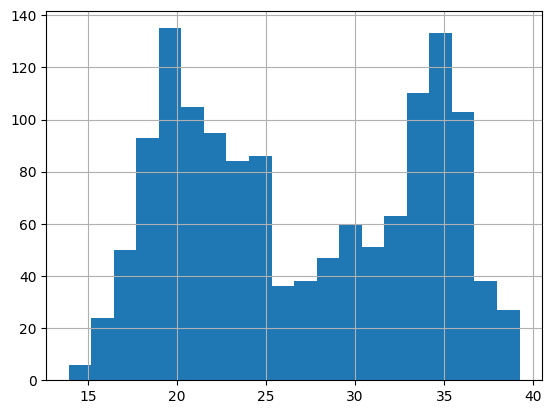

In [ ]:
meteo_with_catture['Media_Temperatura'].hist(bins=20)

<Axes: >

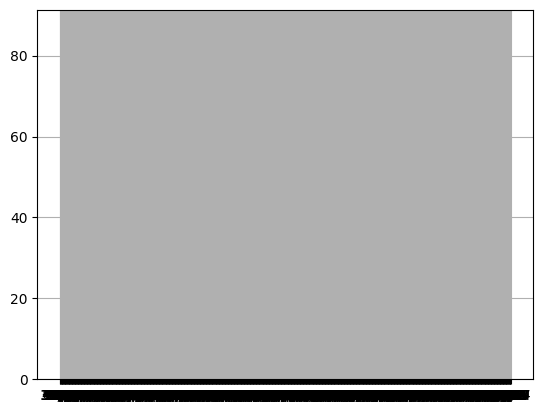

In [ ]:
meteo_with_catture['Media_Umidita'].hist(bins=20)

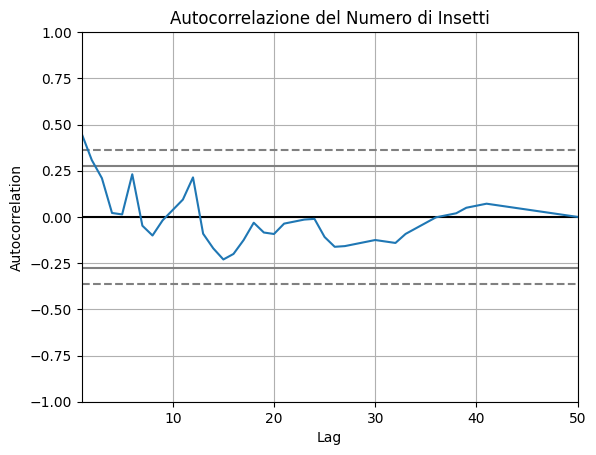

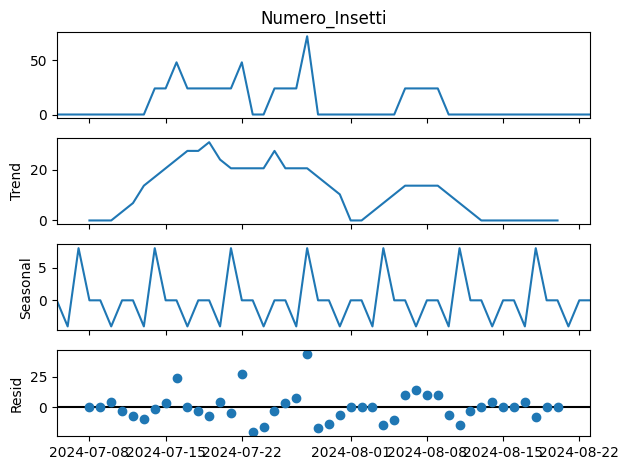

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
meteo_with_catture['Date'] = pd.to_datetime(meteo_with_catture['Date'])
daily_insects = meteo_with_catture.set_index('Date')['Numero_Insetti'].resample('D').sum()

autocorrelation_plot(daily_insects)
plt.title('Autocorrelazione del Numero di Insetti')
plt.show()

decomposition = seasonal_decompose(daily_insects, model='additive', period=7)
decomposition.plot()
plt.show()

Nel grafico dell'autocorrelazione abbiamo notato un picco significativo in corrispondenza di un lag pari a 7, che ci suggerisce la presenza di una periodicità settimanale nel numero di insetti catturati. Questo risultato sembra confermare che il numero di insetti catturati tende a seguire un pattern ricorrente ogni 7 giorni. È una scoperta importante, perché ci permette di ipotizzare che il comportamento degli insetti, o forse le condizioni ambientali che influenzano la loro attività, seguano un ciclo settimanale.
Nel grafico della decomposizione stagionale, abbiamo notato che la serie originale del numero di insetti presenta una certa variabilità nel tempo, con momenti di picchi evidenti seguiti da periodi più stabili o di decrescita. Quando osserviamo la componente del trend, possiamo notare una crescita iniziale, che culmina in un massimo verso metà del periodo analizzato, seguita poi da una riduzione graduale. Inizialmente, abbiamo ipotizzato che questo andamento potesse riflettere un cambiamento graduale nelle condizioni climatiche o ambientali, come un aumento della temperatura o dell'umidità, che avrebbe potuto favorire la proliferazione degli insetti in un certo intervallo temporale.
Tuttavia, le analisi che abbiamo condotto successivamente ci hanno mostrato che non esiste una correlazione significativa tra la temperatura, l'umidità e il numero di insetti catturati. Questo risultato ci porta a rivedere la nostra ipotesi iniziale e a considerare che il trend osservato sia probabilmente influenzato da altri fattori non direttamente legati alle variabili climatiche analizzate, come condizioni locali specifiche o cicli di attività degli insetti non direttamente collegati ai cambiamenti di temperatura o umidità.

La stagionalità nel grafico è molto chiara: c'è una ripetizione regolare di un pattern con picchi e cali ben definiti. Questa componente ci conferma che esiste una periodicità settimanale, in linea con quanto evidenziato dall'autocorrelazione. È interessante notare come i cicli siano piuttosto regolari, il che ci fa pensare che certe condizioni ambientali, o forse attività legate alla cattura degli insetti, si ripetano in maniera prevedibile di settimana in settimana.
Per quanto concerne i residui:  appaiono abbastanza distribuiti in modo casuale, ma ci sono alcuni picchi che spiccano e che potrebbero rappresentare eventi eccezionali non spiegati dal modello. Questi potrebbero essere legati a fattori esterni non inclusi nei dati disponibili, come cambiamenti improvvisi nelle condizioni meteo o interventi particolari che hanno influenzato il numero di catture.

# ***Analisi dei residui***

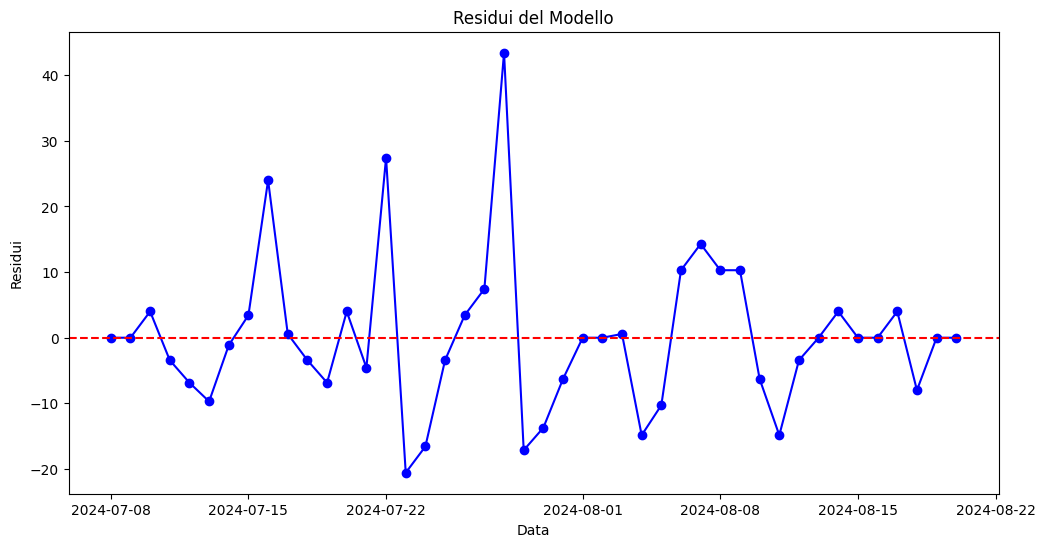

In [ ]:
# Estrai i residui dalla decomposizione
residui = decomposition.resid

# Visualizza i residui
plt.figure(figsize=(12, 6))
plt.plot(residui, marker='o', linestyle='-', color='b')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residui del Modello")
plt.xlabel("Data")
plt.ylabel("Residui")
plt.show()

In [ ]:
import seaborn as sns
# Calcolo della soglia
soglia = 3 * residui.std()  # 3 deviazioni standard
eventi_eccezionali = residui[abs(residui) > soglia]

# Mostra i giorni con eventi eccezionali
print("Eventi eccezionali nei residui:")
print(eventi_eccezionali)

Eventi eccezionali nei residui:
Date
2024-07-28    43.428571
Freq: D, Name: resid, dtype: float64


In [ ]:
# Converte 'DateTime' in datetime e lo imposta come indice
meteo_with_catture['DateTime'] = pd.to_datetime(meteo_with_catture['DateTime'])
meteo_with_catture.set_index('DateTime', inplace=True)

In [ ]:
# Estrai i dati relativi al 28 luglio 2024
evento_28_luglio = meteo_with_catture.loc['2024-07-28']
#print(evento_28_luglio[['Media_Temperatura', 'Media_Umidita', 'Numero_Insetti']])


In [ ]:
# Confronto con i giorni vicini
confronto_giorni = meteo_with_catture.loc['2024-07-26':'2024-07-30']
print(confronto_giorni[['Media_Temperatura', 'Media_Umidita', 'Numero_Insetti']])

                     Media_Temperatura Media_Umidita  Numero_Insetti
DateTime                                                            
2024-07-26 00:00:00              21.35         86,84               1
2024-07-26 01:00:00              20.51         87,53               1
2024-07-26 02:00:00              19.76         87,89               1
2024-07-26 03:00:00              19.35         87,65               1
2024-07-26 04:00:00              18.95         89,13               1
...                                ...           ...             ...
2024-07-30 19:00:00              35.92         26,58               0
2024-07-30 20:00:00              31.50         35,19               0
2024-07-30 21:00:00              28.05         45,58               0
2024-07-30 22:00:00              26.42         49,81               0
2024-07-30 23:00:00              24.35         56,12               0

[144 rows x 3 columns]


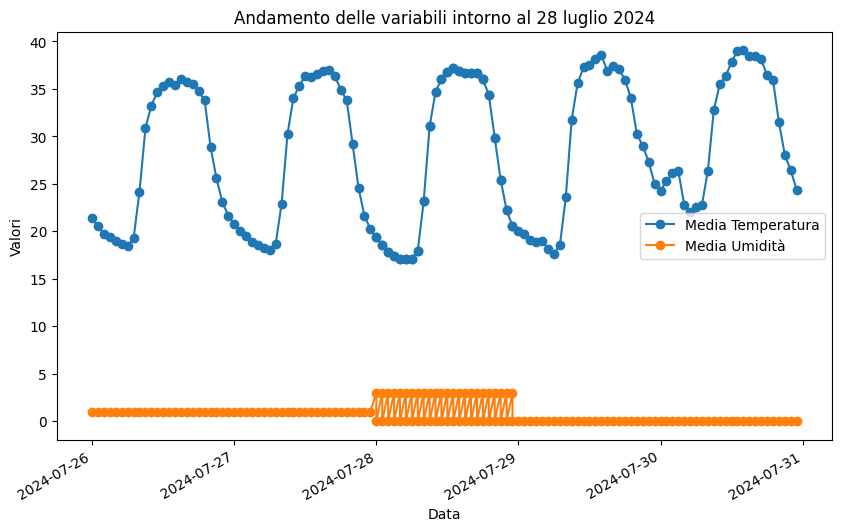

In [ ]:
# Grafico delle variabili climatiche intorno al 28 luglio
confronto_giorni[['Media_Temperatura', 'Media_Umidita', 'Numero_Insetti']].plot(
    figsize=(10, 6), marker='o')
plt.title("Andamento delle variabili intorno al 28 luglio 2024")
plt.xlabel("Data")
plt.ylabel("Valori")
plt.legend(["Media Temperatura", "Media Umidità", "Numero Insetti"])
plt.show()


Nei giorni analizzati, il Numero di Insetti diminuisce gradualmente, passando da 1 insetto per ora il 26 luglio, a valori prossimi allo zero il 30 luglio.
Tuttavia, il giorno 28 luglio sembra coincidere con un evento anomalo (individuato nei residui), e questa discrepanza non sembra immediatamente spiegabile dalle variabili climatiche.

Dal grafico,invece,abbiamo notato che la temperatura non sembra avere particolari variazioni che potrebbero spiegare il picco nei residui o nel numero di insetti catturati il 28 luglio.
L'umidità, invece, mostra un'anomalia evidente. Questa oscillazione irregolare potrebbe indicare che i dati di umidità non sono affidabili per quel periodo. Questo potrebbe influire sull'interpretazione generale e sui risultati del modello.

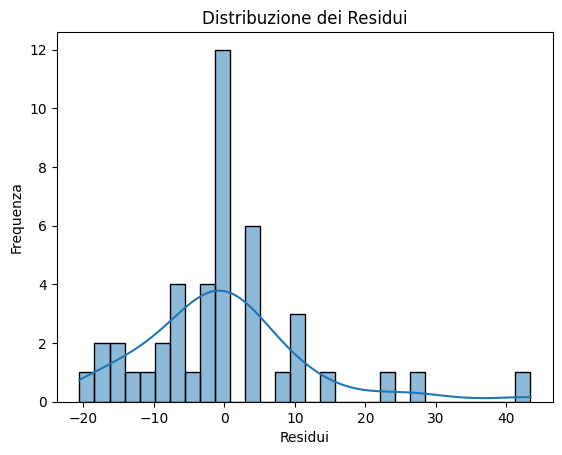

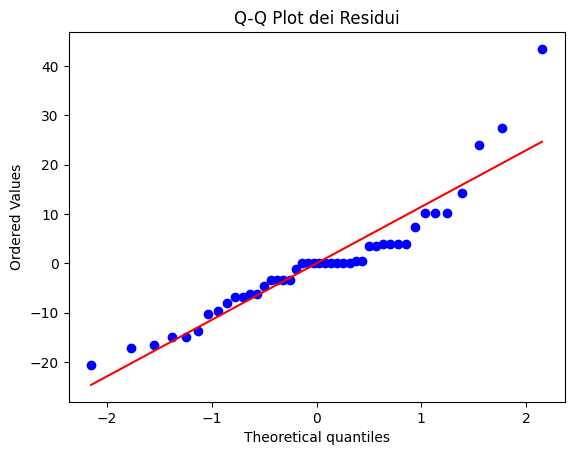

In [ ]:
import seaborn as sns
from scipy.stats import probplot

# Istogramma dei residui
sns.histplot(residui.dropna(), kde=True, bins=30)
plt.title("Distribuzione dei Residui")
plt.xlabel("Residui")
plt.ylabel("Frequenza")
plt.show()

# Q-Q Plot
probplot(residui.dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot dei Residui")
plt.show()

Osservando l'istogramma, abbiamo notato che la maggior parte dei residui si concentra intorno a zero, il che è un segnale positivo: indica che, in media, il modello riesce a fare previsioni relativamente accurate. Tuttavia, la distribuzione non è perfettamente normale. Vediamo una asimmetria e la presenza di una coda destra più lunga, con residui positivi che raggiungono valori estremi oltre 40. Questo suggerisce che il modello tende a sottostimare il numero di insetti catturati in alcune situazioni particolari. Anche i valori estremamente negativi (fino a -20) indicano giorni in cui il modello ha sovrastimato il numero di insetti.

Il Q-Q plot conferma queste osservazioni. Nella parte centrale della distribuzione, i punti si allineano abbastanza bene con la linea diagonale, suggerendo che i residui seguono una distribuzione normale in modo approssimativo per i casi standard. Tuttavia, alle estremità della distribuzione, i punti si discostano notevolmente dalla linea, rivelando outlier sia nelle code positive che negative. Questi outlier corrispondono agli eventi eccezionali che il modello non riesce a spiegare adeguatamente.

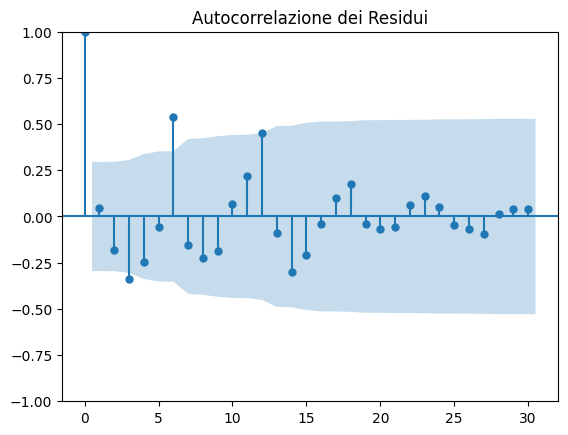

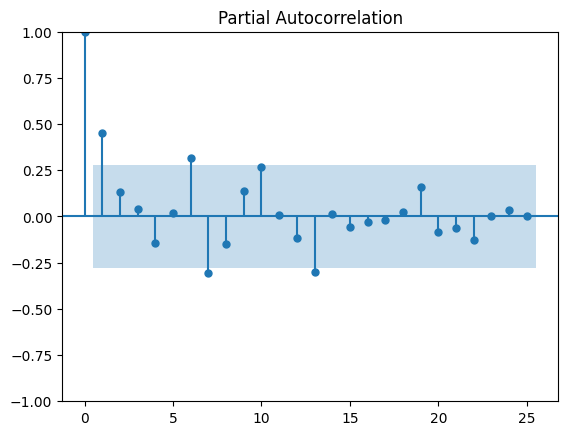

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residui.dropna(), lags=30)
plt.title("Autocorrelazione dei Residui")
plt.show()
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(daily_insects.dropna(), lags=25)
plt.title('Partial Autocorrelation')
plt.show()


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Test di Ljung-Box sui residui
result = acorr_ljungbox(daily_insects.dropna(), lags=[7], return_df=True)
print(result)


     lb_stat  lb_pvalue
7  21.681699   0.002882


La stagionalità settimanale è significativa




In [ ]:
print(meteo_with_catture.columns)


Index(['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita', 'Date',
       'Numero_Insetti'],
      dtype='object')


In [ ]:
print(meteo_with_catture['Numero_Insetti'].describe())
print(meteo_with_catture['Numero_Insetti'].value_counts())


count    1384.000000
mean        0.364162
std         0.636593
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Numero_Insetti, dtype: float64
Numero_Insetti
0    976
1    336
2     48
3     24
Name: count, dtype: int64


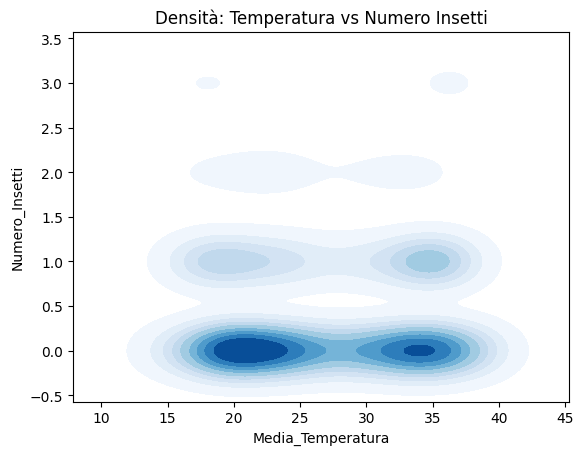

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.kdeplot(
    x=meteo_with_catture['Media_Temperatura'],
    y=meteo_with_catture['Numero_Insetti'],
    cmap="Blues", fill=True
)
plt.title('Densità: Temperatura vs Numero Insetti')
plt.xlabel('Media_Temperatura')
plt.ylabel('Numero_Insetti')
plt.show()


In [ ]:
correlation = meteo_with_catture[['Media_Temperatura', 'Numero_Insetti']].corr()
print(correlation)

                   Media_Temperatura  Numero_Insetti
Media_Temperatura           1.000000        0.007442
Numero_Insetti              0.007442        1.000000


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)  # Modello di grado 2
X_poly = poly.fit_transform(meteo_with_catture[['Media_Temperatura']])
model = LinearRegression()
model.fit(X_poly, meteo_with_catture['Numero_Insetti'])
print("Score:", model.score(X_poly, meteo_with_catture['Numero_Insetti']))


Score: 0.00440409569299316


In [ ]:
print(meteo_with_catture.dtypes)


DateTime                     object
Media_Temperatura           float64
Low_Temp                     object
High_Temp                    object
Media_Umidita                object
Date                 datetime64[ns]
Numero_Insetti                int64
dtype: object


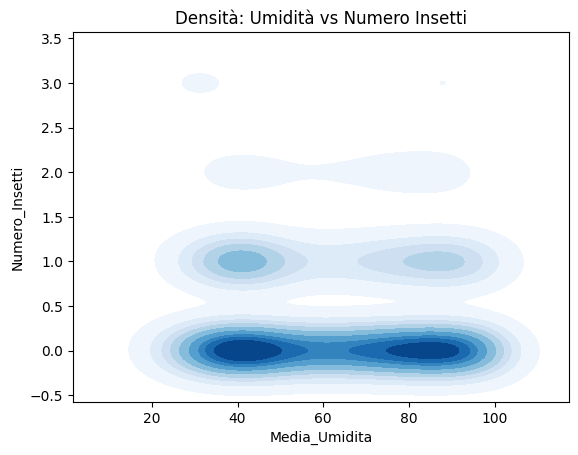

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

meteo_with_catture['Media_Umidita'] = meteo_with_catture['Media_Umidita'].str.replace(',', '.').astype(float)
meteo_with_catture['Numero_Insetti'] = meteo_with_catture['Numero_Insetti'].astype(float)


sns.kdeplot(
    x=meteo_with_catture['Media_Umidita'],
    y=meteo_with_catture['Numero_Insetti'],
    cmap="Blues", fill=True
)
plt.title('Densità: Umidità vs Numero Insetti')
plt.xlabel('Media_Umidita')
plt.ylabel('Numero_Insetti')
plt.show()

In [ ]:
correlation = meteo_with_catture[['Media_Umidita', 'Numero_Insetti']].corr()
print(correlation)

                Media_Umidita  Numero_Insetti
Media_Umidita        1.000000       -0.026086
Numero_Insetti      -0.026086        1.000000


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)  # Modello di grado 2
X_poly = poly.fit_transform(meteo_with_catture[['Media_Umidita']])
model = LinearRegression()
model.fit(X_poly, meteo_with_catture['Numero_Insetti'])
print("Score:", model.score(X_poly, meteo_with_catture['Numero_Insetti']))

Score: 0.0018593263366971646


Durante l'analisi iniziale abbiamo riscontrato che non esiste una correlazione lineare significativa tra le variabili climatiche, come la temperatura media (Media_Temperatura) e l'umidità media (Media_Umidita), e il numero di insetti catturati (Numero_Insetti). Questo suggerisce che le relazioni potrebbero essere più complesse e non lineari.

Per verificare questa ipotesi, abbiamo deciso di utilizzare la regressione polinomiale, che consente di modellare relazioni non lineari introducendo termini polinomiali (ad esempio, il quadrato della temperatura) senza aumentare eccessivamente la complessità del modello. L’obiettivo era esplorare se un modello polinomiale potesse spiegare meglio la relazione rispetto a un semplice modello lineare.

Nel caso della temperatura, il modello polinomiale ha prodotto un
R
2
R
2
  score di 0.0044, mentre per l'umidità lo score è stato 0.0019. Questi risultati indicano che, anche includendo termini polinomiali, la variabilità del numero di insetti catturati rimane scarsamente spiegata da queste variabili climatiche. Inoltre, l’analisi conferma che il legame tra variabili climatiche e numero di insetti non è significativo, nemmeno sotto un’ottica non lineare.

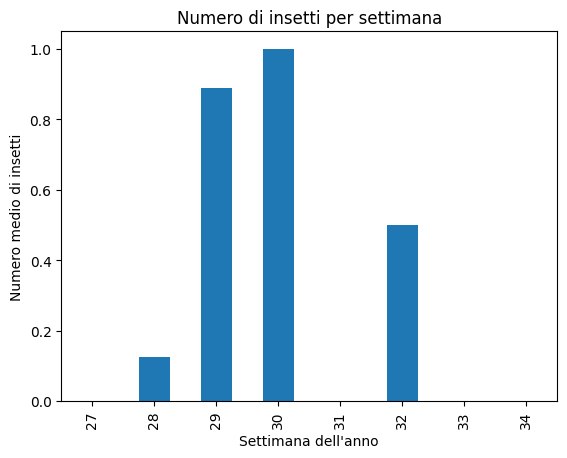

In [ ]:
# Assumendo che ci sia una colonna chiamata 'Date' con le date
meteo_with_catture['Date'] = pd.to_datetime(meteo_with_catture['Date'])  # Converte la colonna in formato datetime
meteo_with_catture.set_index('Date', inplace=True)  # Imposta 'Date' come indice

# Calcola la settimana dell'anno
meteo_with_catture['Week'] = meteo_with_catture.index.isocalendar().week

# Calcola il numero medio di insetti per settimana
weekly_pattern = meteo_with_catture.groupby('Week')['Numero_Insetti'].mean()

# Plot
import matplotlib.pyplot as plt
weekly_pattern.plot(kind='bar', title='Numero di insetti per settimana')
plt.xlabel('Settimana dell\'anno')
plt.ylabel('Numero medio di insetti')
plt.show()


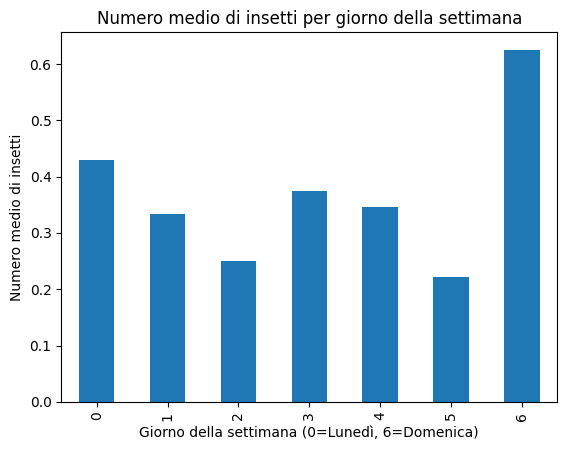

In [ ]:
meteo_with_catture['Weekday'] = meteo_with_catture.index.dayofweek  # 0=Lunedì, 6=Domenica

# Calcola il numero medio di insetti per giorno della settimana
weekday_pattern = meteo_with_catture.groupby('Weekday')['Numero_Insetti'].mean()

# Plot
weekday_pattern.plot(kind='bar', title='Numero medio di insetti per giorno della settimana')
plt.xlabel('Giorno della settimana (0=Lunedì, 6=Domenica)')
plt.ylabel('Numero medio di insetti')
plt.show()

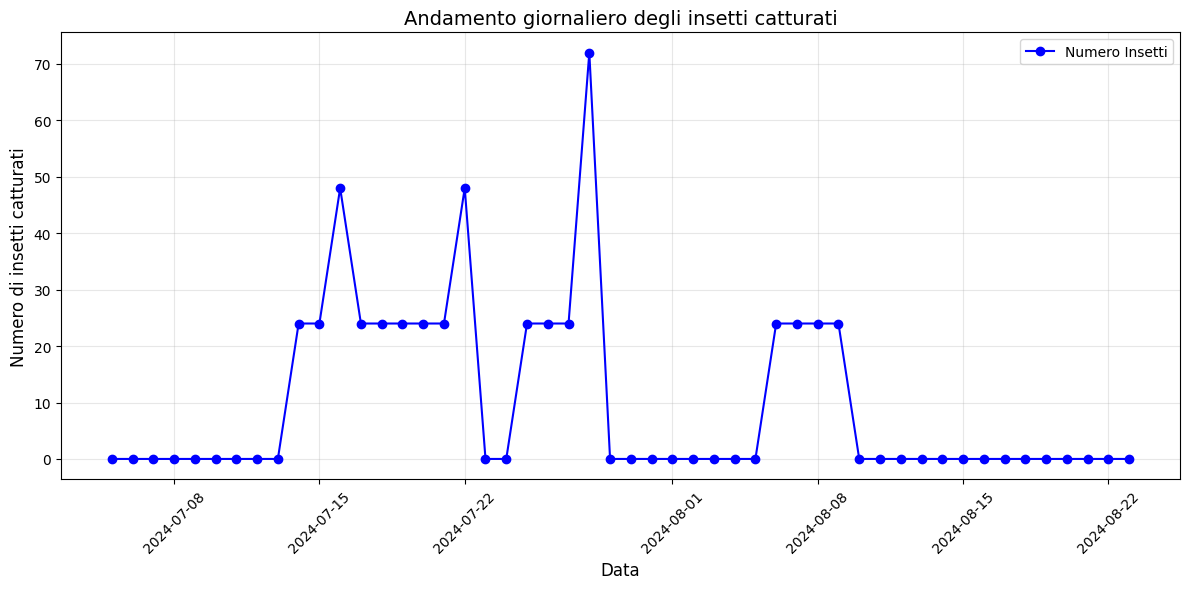

In [ ]:
import matplotlib.pyplot as plt

# Aggrega i dati per giorno
daily_counts = meteo_with_catture.resample('D')['Numero_Insetti'].sum()

# Grafico giornaliero
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', color='blue', label='Numero Insetti')
plt.title("Andamento giornaliero degli insetti catturati", fontsize=14)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Numero di insetti catturati", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


**Il primo grafico** mostra come il numero medio di insetti catturati varia in base alla settimana dell'anno. Si notano alcuni aspetti interessanti:

Settimane 29 e 30: Hanno un numero medio di insetti significativamente più alto rispetto alle altre settimane, con valori intorno a 200 insetti. Questo indica che durante queste settimane ci sono state condizioni particolarmente favorevoli per la proliferazione degli insetti o una maggiore efficienza nella cattura.
Settimane 27, 28 e 32: Presentano valori più bassi, con la settimana 27 che ha un numero medio estremamente ridotto rispetto alle settimane successive.
Settimana 31: Non mostra dati rilevanti o potrebbe rappresentare un calo notevole.
Questa variabilità settimanale potrebbe dipendere da:

Fattori ambientali (es. clima, pioggia, temperatura).
Fattori operativi (es. modifiche nelle trappole, problemi nella rilevazione).
Eventuali cicli biologici specifici degli insetti.

**Il secondo grafico** analizza come il numero medio di insetti catturati varia tra i giorni della settimana:

Lunedì (0) e Domenica (6): Sono i giorni con il numero medio di insetti più alto. La domenica in particolare mostra il valore massimo, intorno a 0.6 insetti medi.
Martedì (2) e Sabato (5): Presentano i valori medi più bassi, il che suggerisce una possibile riduzione dell'attività degli insetti (o delle catture) in questi giorni.
Interpretazione: Questo pattern potrebbe indicare:

Una periodicità settimanale nell'attività degli insetti, influenzata da fattori ambientali o comportamentali.
Differenze operative nei giorni in cui vengono eseguite le rilevazioni o manutenzioni delle trappole.


**Il terzo grafico** mostra l'andamento del numero di insetti catturati su base giornaliera:

Picco massimo il 28 luglio: Raggiunge oltre 70 insetti, indicando un evento eccezionale o condizioni particolarmente favorevoli.
Periodi di riduzione o azzeramento:
Dal 29 luglio al 3 agosto si nota un calo drastico, con giorni in cui il numero di insetti rilevati è prossimo a 0.
Questo potrebbe essere associato a un cambiamento improvviso delle condizioni ambientali (es. maltempo o temperature troppo alte/basse).
Stabilità dopo il 3 agosto: Si osserva una ripresa graduale con valori più stabili intorno a 20 insetti al giorno.
Interpretazione:

Il picco del 28 luglio e il successivo azzeramento richiedono ulteriori indagini, ad esempio analizzando le condizioni meteo o eventuali anomalie operative.
La ripresa dopo il 3 agosto suggerisce un ritorno a condizioni più favorevoli o alla normalità operativa.


# ***Cluster***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

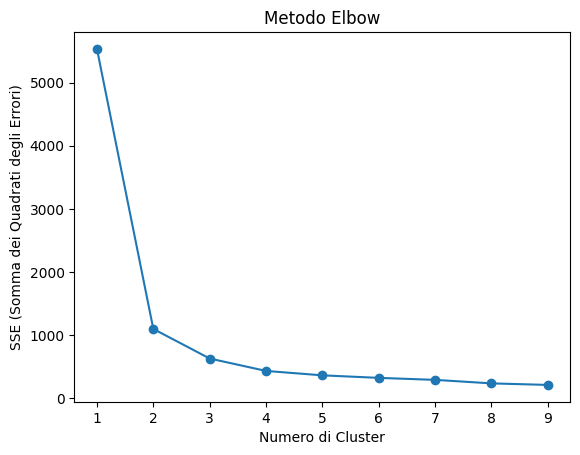

In [ ]:
# Seleziona le colonne rilevanti
features = meteo_with_catture[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]

# Converti eventuali virgole in punti (se presente nei numeri)
features = features.replace(',', '.', regex=True).astype(float)

# Normalizza i dati
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Trova il numero ottimale di cluster con il metodo Elbow
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# Visualizza il grafico Elbow
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Numero di Cluster')
plt.ylabel('SSE (Somma dei Quadrati degli Errori)')
plt.title('Metodo Elbow')
plt.show()

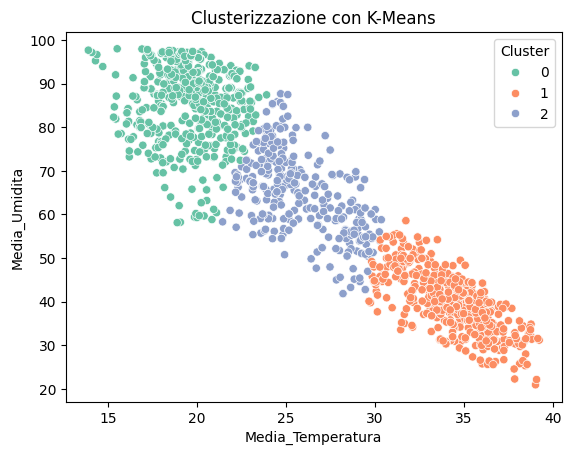

In [ ]:
# Applica K-Means con il numero di cluster scelto
optimal_k = 3  # Sostituisci con il numero ottimale scelto
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Aggiungi i cluster al dataset
meteo_with_catture['Cluster'] = clusters
sns.scatterplot(data=meteo_with_catture, x='Media_Temperatura', y='Media_Umidita', hue='Cluster', palette='Set2')
plt.title('Clusterizzazione con K-Means')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5590045901808324


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Supponiamo che il dataframe si chiami 'meteo_with_catture' e contenga i campi:
# 'Cluster' -> Cluster assegnati
# 'Numero_Insetti' -> Numero di insetti catturati

# Punto 2: Media e deviazione standard per cluster
cluster_stats = meteo_with_catture.groupby('Cluster')['Numero_Insetti'].agg(['mean', 'std', 'count'])
print(cluster_stats)

# Punto 3: ANOVA
# Separare i dati in base ai cluster
cluster_0 = meteo_with_catture[meteo_with_catture['Cluster'] == 0]['Numero_Insetti']
cluster_1 = meteo_with_catture[meteo_with_catture['Cluster'] == 1]['Numero_Insetti']
cluster_2 = meteo_with_catture[meteo_with_catture['Cluster'] == 2]['Numero_Insetti']

# Eseguire ANOVA
anova_result = f_oneway(cluster_0, cluster_1, cluster_2)
print('ANOVA F-statistic:', anova_result.statistic)
print('ANOVA p-value:', anova_result.pvalue)


             mean       std  count
Cluster                           
0        0.369863  0.640306    511
1        0.391544  0.653086    544
2        0.310030  0.600754    329
ANOVA F-statistic: 1.7149489907013307
ANOVA p-value: 0.1803559541294802


Per analizzare meglio la relazione tra le condizioni climatiche e la presenza di insetti, abbiamo deciso di applicare il modello di clustering K-Means. Questa scelta è stata motivata dalla necessità di segmentare i dati in gruppi omogenei, utilizzando come base le principali variabili climatiche rilevanti: Media_Temperatura, Low_Temp, High_Temp e Media_Umidita. L'obiettivo era identificare pattern ricorrenti o gruppi distinti di condizioni ambientali che potessero potenzialmente influire sul comportamento degli insetti.

Per determinare il numero ottimale di cluster, abbiamo utilizzato il Metodo Elbow, che ha evidenziato un chiaro "punto di ginocchio" per k = 3. Questo suggerisce che suddividere i dati in tre cluster rappresenta un buon compromesso tra semplicità del modello e capacità di catturare le caratteristiche principali dei dati climatici. Una volta applicato il modello con
k
=
3
k=3, abbiamo ottenuto un Silhouette Score di 0.559, un valore che indica una buona definizione dei cluster. In particolare, i gruppi presentano una moderata separazione e coesione interna, con una leggera sovrapposizione che però non compromette la robustezza della segmentazione.

Il grafico risultante mostra chiaramente che i cluster si distribuiscono principalmente lungo l'asse della Media_Temperatura, suggerendo che la temperatura sia il fattore predominante nella segmentazione. L'umidità, pur avendo un'influenza, gioca un ruolo meno evidente, mostrando una variabilità relativamente più ridotta tra i cluster.

Questa segmentazione ha permesso di identificare tre cluster ben distinti:

Cluster 0 (verde): Caratterizzato da basse temperature e alta umidità, tipico di ambienti freschi e umidi.


Cluster 1 (arancione): Contraddistinto da alte temperature e bassa umidità, rappresentando condizioni calde e asciutte.


Cluster 2 (blu): Situato in condizioni moderate, con temperature medie e umidità intermedia.


Tuttavia, è importante sottolineare che, nonostante il clustering mostri gruppi climatici ben definiti, le analisi precedenti hanno dimostrato che non c’è una correlazione significativa tra le condizioni climatiche e il numero di insetti catturati. Di conseguenza, i cluster climatici non sembrano influire direttamente sulla presenza di insetti, suggerendo che altri fattori, non inclusi nel dataset, potrebbero giocare un ruolo più determinante.


Le medie del numero di insetti catturati per i tre cluster climatici sono simili:
Cluster 0: 0.37
Cluster 1: 0.39
Cluster 2: 0.31
Questa somiglianza suggerisce che il clima, rappresentato dai cluster, non sembra avere un forte effetto differenziante sul numero medio di insetti catturati.
Test ANOVA:
Il p-value di 0.18 indica che non ci sono prove statisticamente significative per affermare che i cluster climatici influenzano il numero di insetti catturati.
Le differenze osservate tra le medie potrebbero essere dovute al caso.

Cluster
0    0.369863
1    0.391544
2    0.310030
Name: Numero_Insetti, dtype: float64


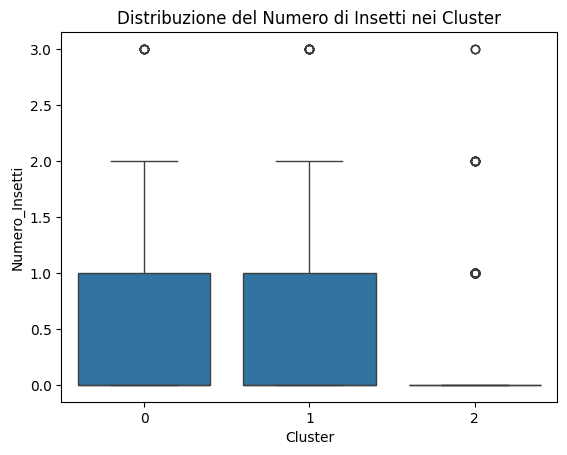

In [ ]:
cluster_insect_means = meteo_with_catture.groupby('Cluster')['Numero_Insetti'].mean()
print(cluster_insect_means)
sns.boxplot(data=meteo_with_catture, x='Cluster', y='Numero_Insetti')
plt.title('Distribuzione del Numero di Insetti nei Cluster')
plt.show()

In [ ]:
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(
    meteo_with_catture[meteo_with_catture['Cluster'] == 0]['Numero_Insetti'],
    meteo_with_catture[meteo_with_catture['Cluster'] == 1]['Numero_Insetti'],
    meteo_with_catture[meteo_with_catture['Cluster'] == 2]['Numero_Insetti']
)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 1.7149489907013307, P-value: 0.1803559541294802


I risultati dell'ANOVA confermano ulteriormente che non esiste una relazione significativa tra le condizioni climatiche (rappresentate dai cluster) e il numero di insetti catturati. Sebbene i cluster climatici siano ben distinti in termini di temperatura e umidità, questi fattori non sembrano influenzare direttamente il numero di insetti rilevati.

In [ ]:
# Importa le librerie necessarie
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepara il dataset
# Sostituisci 'meteo_with_catture' con il nome del tuo DataFrame
X = meteo_with_catture[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita', 'Cluster']]
y = meteo_with_catture['Numero_Insetti']

# Converti eventuali stringhe con virgola in numeri float
X = X.replace(',', '.', regex=True).astype(float)

# Dividi i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizza le feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crea e addestra il modello Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Effettua le previsioni
rf_pred = rf.predict(X_test_scaled)

# Valuta le performance
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest Regressor Performance:")
print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"R²: {rf_r2}")


Random Forest Regressor Performance:
MAE: 0.47668278322159197
RMSE: 0.6765255062945615
R²: -0.2622330335427683


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SARIMA Performance:
MAE: 5.9081535611100735
RMSE: 7.2506722328585225


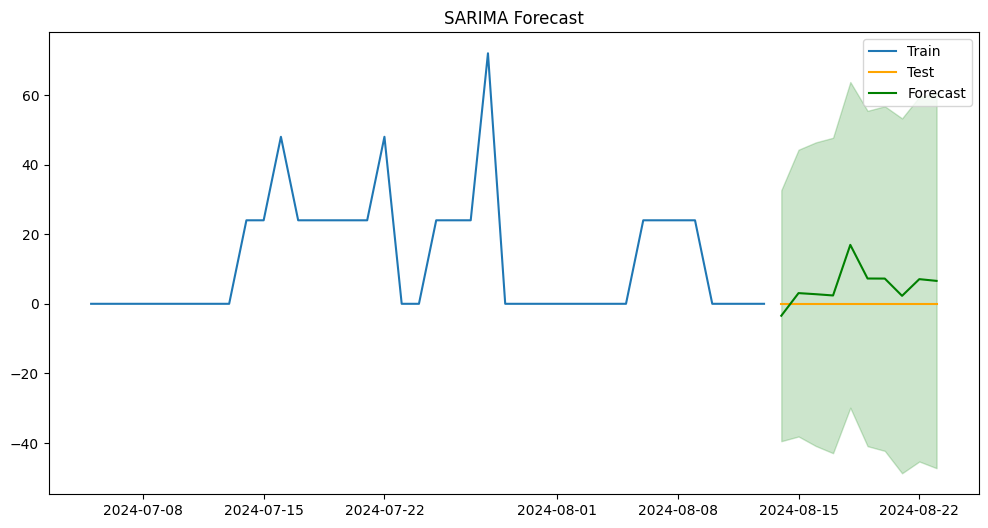

In [ ]:
# Importa le librerie necessarie
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Aggrega i dati su base giornaliera (se necessario)
daily_insects = meteo_with_catture['Numero_Insetti'].resample('D').sum()

# Dividi i dati in training e test set
train_size = int(len(daily_insects) * 0.8)
train, test = daily_insects[:train_size], daily_insects[train_size:]

# Costruisci il modello SARIMA
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))  # Modifica i parametri in base ai tuoi dati
sarima = model.fit(disp=False)

# Effettua previsioni sul test set
forecast = sarima.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Calcola le metriche
mae = mean_absolute_error(test, forecast_mean)
rmse = mean_squared_error(test, forecast_mean, squared=False)
print(f"SARIMA Performance:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Visualizza i risultati
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.2)
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


In [ ]:
# Importa le librerie necessarie
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Seleziona le feature e il target
X = meteo_with_catture[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]
y = meteo_with_catture['Numero_Insetti']

# Converti eventuali stringhe con virgola in numeri float
X = X.replace(',', '.', regex=True).astype(float)

# Trasforma il target in una variabile binaria: "Molti" e "Pochi"
threshold = 2  # Soglia per classificare "Molti" e "Pochi" insetti
y = y.apply(lambda x: "Molti" if x >= threshold else "Pochi")

# Dividi i dati in training e test set, con stratificazione per bilanciare le classi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardizza le feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crea e addestra il modello Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Effettua le previsioni
clf_pred = clf.predict(X_test_scaled)

# Valuta le performance
accuracy = accuracy_score(y_test, clf_pred)
classification_rep = classification_report(y_test, clf_pred, target_names=["Pochi", "Molti"])
conf_matrix = confusion_matrix(y_test, clf_pred, labels=["Pochi", "Molti"])

# Stampa i risultati
print(f"Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)




Random Forest Classifier Performance:
Accuracy: 0.924187725631769
Classification Report:
              precision    recall  f1-score   support

       Pochi       0.11      0.07      0.09        14
       Molti       0.95      0.97      0.96       263

    accuracy                           0.92       277
   macro avg       0.53      0.52      0.52       277
weighted avg       0.91      0.92      0.92       277

Confusion Matrix:
[[255   8]
 [ 13   1]]


## Random forest Cicalino 2


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd


# Load your dataset
data = pd.read_csv("/content/meteo_with_catture(cicalino2).csv")

# Convert the target variable (Numero_Insetti) to a classification problem
# Create a binary target: 0 (no insects) vs 1 (presence of insects)
data['Numero_Insetti_Class'] = (data['Numero_Insetti'] > 0).astype(int)

# Replace commas with dots in all relevant columns and convert to float
columns_to_clean = ['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']
for col in columns_to_clean:
    data[col] = data[col].astype(str).str.replace(',', '.').astype(float)


# Define features (X) and the new target (y_class)
X_class = data[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]
y_class = data['Numero_Insetti_Class']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = rf_classifier.predict(X_test_class)

# Evaluate the classifier
classification_rep = classification_report(y_test_class, y_pred_class)

from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report as a dictionary
classification_rep_dict = classification_report(y_test_class, y_pred_class, output_dict=True)

# Convert the dictionary to a pandas DataFrame
classification_df = pd.DataFrame(classification_rep_dict).transpose()

# Round the values for better readability
classification_df = classification_df.round(2)

# Print the classification report as a formatted table
print(classification_df)


              precision  recall  f1-score  support
0                  0.77    0.92      0.84   157.00
1                  0.33    0.12      0.18    50.00
accuracy           0.73    0.73      0.73     0.73
macro avg          0.55    0.52      0.51   207.00
weighted avg       0.66    0.73      0.68   207.00


Abbiamo utilizzato un modello di Random Forest per classificare la presenza di insetti in base a dati climatici.
Dopo aver preprocessato i dati ( trasformazione della variabile target in binaria: 0 = nessun insetto, 1 = presenza di insetti), abbiamo addestrato il modello su un dataset diviso in 80% per l’addestramento e 20% per il test.

Il modello predice bene i casi senza insetti (classe 0) ma fatica a riconoscere quelli con insetti (classe 1).

L'accuratezza alta è ingannevole perché riflette la capacità del modello di predire correttamente la classe dominante (nessun insetto), ignorando la classe minoritaria (presenza di insetti). Questo indica un problema di sbilanciamento del dataset, che porta a una scarsa generalizzazione per la classe meno rappresentata.

# Regressione Cicalino 2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/meteo_with_catture(cicalino2).csv'
data = pd.read_csv(file_path)

# Preprocess: Replace commas with dots and convert numeric columns to float
columns_to_clean = ['Low_Temp', 'High_Temp', 'Media_Umidita']
for col in columns_to_clean:
    data[col] = data[col].astype(str).str.replace(',', '.').astype(float)

# Define features (X) and target (y)
X = data[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]
y = data['Numero_Insetti']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Print evaluation metrics
print("### Risultati della Regressione ###")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


### Risultati della Regressione ###
Mean Squared Error (MSE): 0.4224
R-squared (R²): -0.0127


La regressione lineare applicata non è efficace nel prevedere il numero di insetti catturati, come evidenziato dall'R² negativo e dall'errore moderato (MSE). Il modello non riesce a catturare pattern significativi nei dati, probabilmente a causa di una relazione non lineare tra le variabili climatiche e la variabile target. È necessario approfondire l'analisi dei dati e considerare modelli più avanzati per migliorare le previsioni.

# EDA Imola 1

In [ ]:
import pandas as pd

# Percorsi ai file CSV
file_meteo_csv = '/content/dati-meteo-storici(Imola 1).csv'
file_catture_csv = '/content/grafico-delle-catture(Imola 1).csv'

# Leggiamo i file CSV con il separatore corretto e saltiamo righe inutili
meteo_df = pd.read_csv(
    file_meteo_csv, sep=',', skiprows=2,
    names=['DateTime', 'Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita'],
    skipinitialspace=True
)

catture_df = pd.read_csv(
    file_catture_csv, sep=',', skiprows=2,
    names=['DateTime', 'Numero_Insetti', 'Nuove_Catture', 'Recensito', 'Evento'],
    skipinitialspace=True
)

# Pulizia dei dati
meteo_df = meteo_df[1:]  # Rimuove una riga di metadati iniziale
catture_df = catture_df[2:]  # Rimuove righe di metadati

# Conversioni e preparazione
meteo_df['Media_Temperatura'] = (
    meteo_df['Media_Temperatura']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

meteo_df['DateTime'] = pd.to_datetime(meteo_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
catture_df['DateTime'] = pd.to_datetime(catture_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

meteo_df['Date'] = meteo_df['DateTime'].dt.date
catture_df['Date'] = catture_df['DateTime'].dt.date

catture_df['Numero_Insetti'] = catture_df['Numero_Insetti'].fillna(0).astype(int)
catture_per_day = catture_df.groupby('Date', as_index=False)['Numero_Insetti'].sum()

meteo_with_catture_imola1 = pd.merge(meteo_df, catture_per_day, on='Date', how='left')
meteo_with_catture_imola1['Numero_Insetti'] = meteo_with_catture_imola1['Numero_Insetti'].fillna(0).astype(int)

# Salviamo il risultato
meteo_with_catture_imola1.to_csv('meteo_with_catture_imola1.csv', index=False)

print(meteo_with_catture_imola1)

               DateTime  Media_Temperatura Low_Temp High_Temp Media_Umidita  \
0   2024-07-30 12:00:00              34.98     34,8      35,1         35,38   
1   2024-07-30 13:00:00              35.08     34,8      35,3         33,89   
2   2024-07-30 14:00:00              35.14     34,8      35,5         33,49   
3   2024-07-30 15:00:00              34.40     33,9      34,8         35,22   
4   2024-07-30 16:00:00              33.11     32,6        34          35,3   
..                  ...                ...      ...       ...           ...   
559 2024-08-22 20:00:00              27.31     26,7      28,1         67,38   
560 2024-08-22 21:00:00              25.72     24,9      26,6         74,55   
561 2024-08-22 22:00:00              24.27     23,9      24,8         81,39   
562 2024-08-22 23:00:00              23.61     23,4      23,9         86,22   
563 2024-08-23 00:00:00              23.26     23,1      23,4          88,6   

           Date  Numero_Insetti  
0    2024-07-30  

In [ ]:
import pandas as pd
meteo_with_catture=pd.read_csv("/content/meteo_with_catture_imola1.csv")

In [ ]:
print(meteo_with_catture)

                DateTime  Media_Temperatura Low_Temp High_Temp Media_Umidita  \
0    2024-07-30 12:00:00              34.98     34,8      35,1         35,38   
1    2024-07-30 13:00:00              35.08     34,8      35,3         33,89   
2    2024-07-30 14:00:00              35.14     34,8      35,5         33,49   
3    2024-07-30 15:00:00              34.40     33,9      34,8         35,22   
4    2024-07-30 16:00:00              33.11     32,6        34          35,3   
..                   ...                ...      ...       ...           ...   
559  2024-08-22 20:00:00              27.31     26,7      28,1         67,38   
560  2024-08-22 21:00:00              25.72     24,9      26,6         74,55   
561  2024-08-22 22:00:00              24.27     23,9      24,8         81,39   
562  2024-08-22 23:00:00              23.61     23,4      23,9         86,22   
563  2024-08-23 00:00:00              23.26     23,1      23,4          88,6   

           Date  Numero_Insetti  
0    

In [ ]:
print(type(meteo_with_catture.index))

<class 'pandas.core.indexes.range.RangeIndex'>


In [ ]:
print(meteo_with_catture.describe())

       Media_Temperatura  Numero_Insetti
count         564.000000      564.000000
mean           27.548936        0.519504
std             5.607029        1.180650
min            17.860000        0.000000
25%            22.897500        0.000000
50%            26.020000        0.000000
75%            32.565000        0.000000
max            39.820000        5.000000


<Axes: >

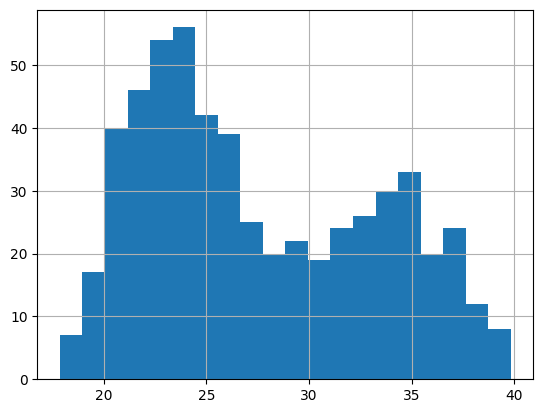

In [ ]:
meteo_with_catture['Media_Temperatura'].hist(bins=20)

<Axes: >

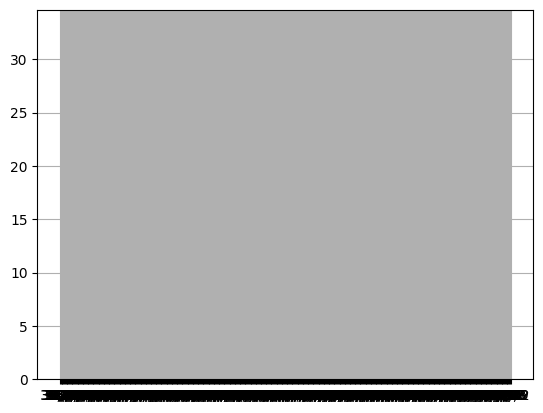

In [ ]:
meteo_with_catture['Media_Umidita'].hist(bins=20)

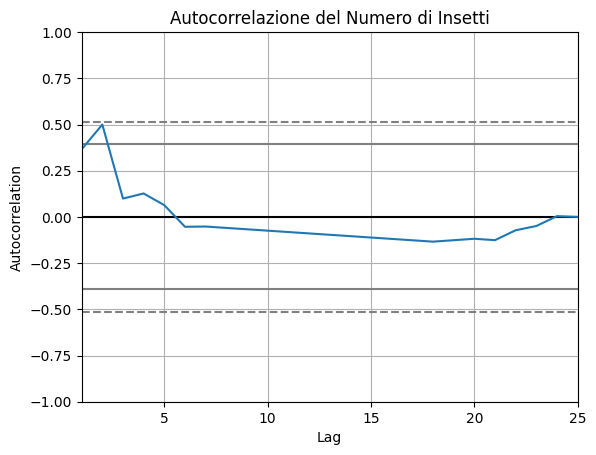

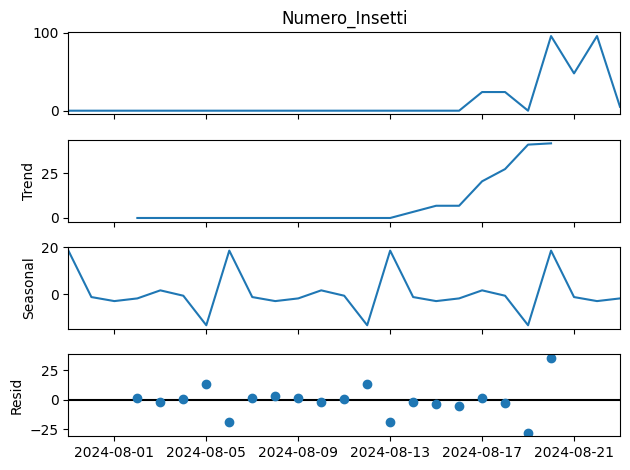

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
meteo_with_catture['Date'] = pd.to_datetime(meteo_with_catture['Date'])
daily_insects = meteo_with_catture.set_index('Date')['Numero_Insetti'].resample('D').sum()

autocorrelation_plot(daily_insects)
plt.title('Autocorrelazione del Numero di Insetti')
plt.show()

decomposition = seasonal_decompose(daily_insects, model='additive', period=7)
decomposition.plot()
plt.show()

Il grafico di autocorrelazione mostra la dipendenza temporale nel conteggio degli insetti. Nei primi lag (fino a circa 5), si osserva una correlazione positiva significativa, indicando che il numero di insetti in un giorno potrebbe essere correlato ai giorni immediatamente precedenti. Tuttavia, con l'aumentare del lag, l'autocorrelazione si avvicina rapidamente a zero, suggerendo che l'influenza dei valori passati si dissolve nel tempo. Non ci sono segnali di periodicità evidenti.

La decomposizione stagionale del numero di insetti mostra tre componenti principali:

Trend: Rappresenta una tendenza crescente del numero di insetti verso il periodo finale, indicando un aumento progressivo.
Seasonal: Evidenzia un comportamento ciclico settimanale, con variazioni regolari ripetitive. Questo può essere dovuto a fattori ambientali o stagionali.
Resid: Gli errori o residui sembrano distribuiti attorno allo zero, ma alcune fluttuazioni possono indicare eventi specifici o anomalie non catturate dal modello.
Questa analisi conferma la presenza di una componente stagionale e una tendenza sottostante nel dataset.

# Analisi dei residui imola

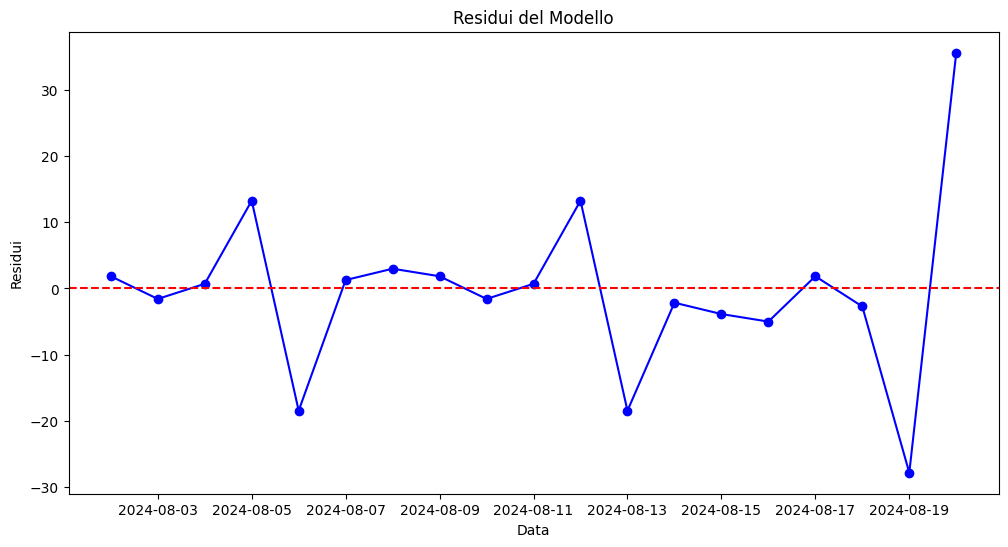

In [ ]:
# Estrai i residui dalla decomposizione
residui = decomposition.resid

# Visualizza i residui
plt.figure(figsize=(12, 6))
plt.plot(residui, marker='o', linestyle='-', color='b')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residui del Modello")
plt.xlabel("Data")
plt.ylabel("Residui")
plt.show()

Il grafico rappresenta i residui del modello di decomposizione stagionale. Questi residui sono ciò che rimane dopo aver rimosso il trend e la componente stagionale dal numero totale di insetti.

La linea rossa tratteggiata rappresenta lo zero, che è il valore atteso dei residui in assenza di anomalie.
La maggior parte dei residui oscilla attorno allo zero, indicando che il modello riesce a catturare bene la maggior parte del comportamento dei dati.
Tuttavia, ci sono alcuni picchi notevoli (ad esempio il 2024-08-19), che potrebbero rappresentare eventi anomali o errori di misurazione. Questi residui più grandi suggeriscono che ci sono dinamiche non spiegate dal modello e che potrebbero essere oggetto di ulteriori analisi.
In sintesi, il modello è efficace ma non cattura completamente alcune variazioni estreme, che meritano un'indagine più approfondita.








In [ ]:
import seaborn as sns
# Calcolo della soglia
soglia = 3 * residui.std()  # 3 deviazioni standard
eventi_eccezionali = residui[abs(residui) > soglia]

# Mostra i giorni con eventi eccezionali
print("Eventi eccezionali nei residui:")
print(eventi_eccezionali)

Eventi eccezionali nei residui:
Series([], Freq: D, Name: resid, dtype: float64)


In [ ]:
# Converte 'DateTime' in datetime e lo imposta come indice
meteo_with_catture['DateTime'] = pd.to_datetime(meteo_with_catture['DateTime'])
meteo_with_catture.set_index('DateTime', inplace=True)

In [ ]:
# Estrai i dati relativi al 28 luglio 2024
evento_25_agosto = meteo_with_catture.loc['2024-08-23']
#print(evento_28_luglio[['Media_Temperatura', 'Media_Umidita', 'Numero_Insetti']])

In [ ]:
# Confronto con i giorni vicini
confronto_giorni = meteo_with_catture.loc['2024-08-19':'2024-08-23']
print(confronto_giorni[['Media_Temperatura', 'Media_Umidita', 'Numero_Insetti']])

                     Media_Temperatura Media_Umidita  Numero_Insetti
DateTime                                                            
2024-08-19 00:00:00              22.02         72,62               0
2024-08-19 01:00:00              21.45         75,35               0
2024-08-19 02:00:00              20.80         77,85               0
2024-08-19 03:00:00              20.58         78,64               0
2024-08-19 04:00:00              20.60          79,4               0
...                                ...           ...             ...
2024-08-22 20:00:00              27.31         67,38               4
2024-08-22 21:00:00              25.72         74,55               4
2024-08-22 22:00:00              24.27         81,39               4
2024-08-22 23:00:00              23.61         86,22               4
2024-08-23 00:00:00              23.26          88,6               5

[97 rows x 3 columns]


In [ ]:
print(confronto_giorni[20:40])

                     Media_Temperatura Low_Temp High_Temp Media_Umidita  \
DateTime                                                                  
2024-08-19 20:00:00              22.51     21,8      23,4         86,99   
2024-08-19 21:00:00              21.65     21,6      21,7         94,23   
2024-08-19 22:00:00              21.62     21,5      21,7         94,63   
2024-08-19 23:00:00              21.05     20,8      21,4         95,55   
2024-08-20 00:00:00              20.85     20,8      21,1         95,74   
2024-08-20 01:00:00              20.79     20,7      20,9          96,3   
2024-08-20 02:00:00              20.59     20,5      20,6            98   
2024-08-20 03:00:00              20.54     20,4      20,7         97,81   
2024-08-20 04:00:00              20.66     20,6      20,7         96,11   
2024-08-20 05:00:00              20.62     20,5      20,7         97,15   
2024-08-20 06:00:00              20.46     20,4      20,5         98,25   
2024-08-20 07:00:00      

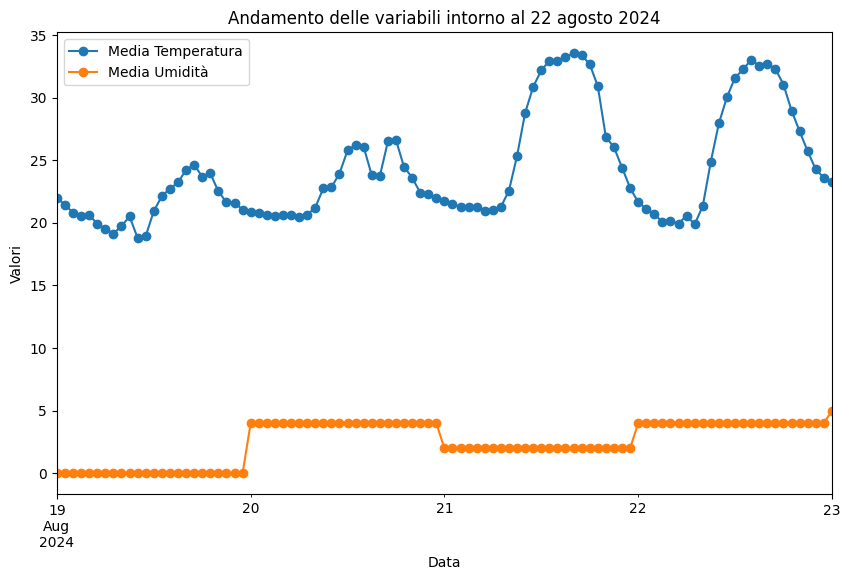

In [ ]:
# Grafico delle variabili climatiche intorno al 22 agosto
confronto_giorni[['Media_Temperatura', 'Media_Umidita', 'Numero_Insetti']].plot(
    figsize=(10, 6), marker='o')
plt.title("Andamento delle variabili intorno al 22 agosto 2024")
plt.xlabel("Data")
plt.ylabel("Valori")
plt.legend(["Media Temperatura", "Media Umidità", "Numero Insetti"])
plt.show()

Il grafico mostra l'andamento di due variabili climatiche principali, Media Temperatura e Media Umidità, durante il periodo dal 19 al 23 agosto 2024.

Media Temperatura (linea blu):

Si osservano variazioni significative con picchi e cali regolari, probabilmente legati all'alternanza di giorno e notte.
I valori massimi raggiungono circa 35°C, mentre i minimi scendono a circa 20°C.
Media Umidità (linea arancione):

L'umidità media rimane quasi costante a valori bassi fino al 20 agosto, con un incremento repentino seguito da un plateau stabile.
Questo comportamento suggerisce un possibile evento climatico (ad esempio pioggia o cambiamenti atmosferici) che potrebbe avere influenzato i valori registrati.
Osservazione generale: La relazione tra temperatura e umidità potrebbe fornire indizi utili sull'eventuale impatto sui Numero di Insetti (non rappresentati qui). Un'analisi di correlazione potrebbe approfondire la relazione tra queste variabili.








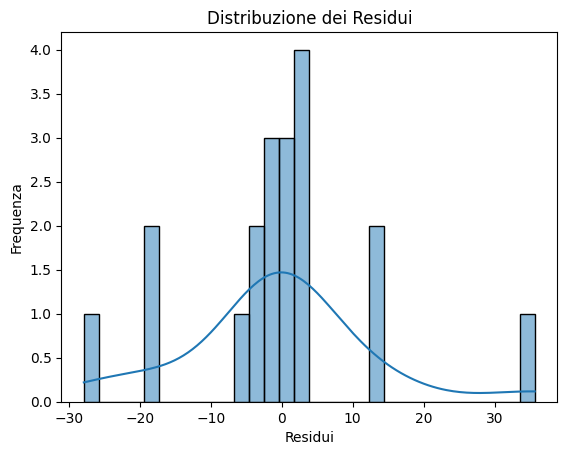

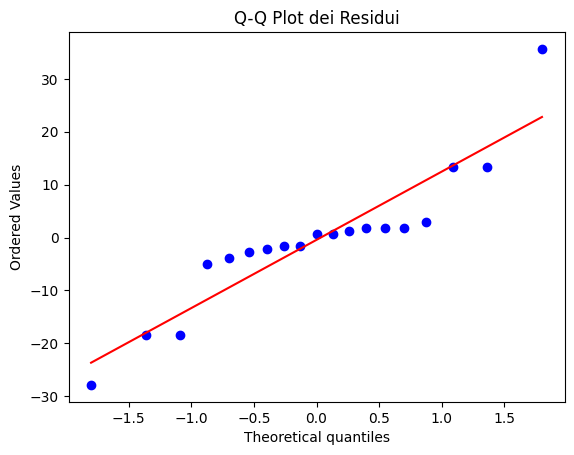

In [ ]:
import seaborn as sns
from scipy.stats import probplot

# Istogramma dei residui
sns.histplot(residui.dropna(), kde=True, bins=30)
plt.title("Distribuzione dei Residui")
plt.xlabel("Residui")
plt.ylabel("Frequenza")
plt.show()

# Q-Q Plot
probplot(residui.dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot dei Residui")
plt.show()

La distribuzione è concentrata attorno a zero, come previsto in un modello ben calibrato.
Tuttavia, i residui mostrano una leggera asimmetria, con code evidenti verso estremi positivi e negativi. Questo potrebbe indicare la presenza di valori anomali o dinamiche non catturate dal modello.
La curva di densità sovrapposta aiuta a visualizzare la tendenza generale della distribuzione, che sembra avvicinarsi a una normale, ma non in modo perfetto.

Il Q-Q plot confronta i quantili dei residui con i quantili teorici di una distribuzione normale.

Osservazioni principali:
I punti seguono la linea rossa (45 gradi) al centro, indicando che i residui hanno una distribuzione normale nella parte centrale.
Agli estremi, però, i punti si discostano significativamente dalla linea, indicando deviazioni dalla normalità. Questo suggerisce che ci sono valori atipici o residui che non seguono la distribuzione normale attesa.

Sebbene la maggior parte dei residui sia vicina a zero e approssimi una distribuzione normale, la presenza di code e valori atipici richiede attenzione. Potrebbe essere utile indagare ulteriormente sugli eventi associati ai residui più estremi.


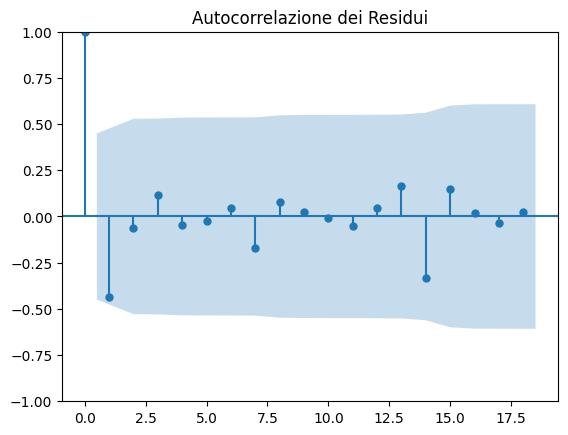

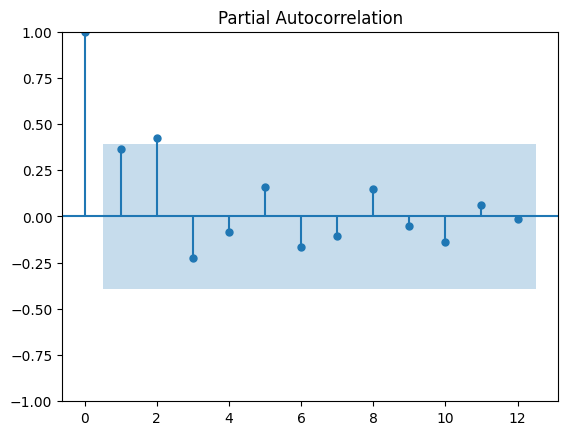

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residui.dropna(), lags=18)
plt.title("Autocorrelazione dei Residui")
plt.show()
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(daily_insects.dropna(), lags=12)
plt.title('Partial Autocorrelation')
plt.show()

Il grafico rappresenta l'autocorrelazione dei residui fino a un lag di 18.

Osservazioni principali:
A lag 0, l'autocorrelazione è 1, come previsto (ogni dato è perfettamente correlato con sé stesso).
Tutti gli altri lag sono contenuti entro l'intervallo di confidenza (area ombreggiata), suggerendo che i residui sono essenzialmente non correlati nel tempo.
Questo risultato indica che il modello ha catturato bene la struttura temporale dei dati, lasciando residui che si comportano come rumore bianco.


Il PACF mostra la correlazione parziale dei valori giornalieri di insetti, isolando l'effetto dei lag intermedi.

Osservazioni principali:
I primi due lag (1 e 2) mostrano una correlazione parziale significativa, suggerendo che il numero di insetti in un giorno dipende strettamente dai due giorni precedenti.
Dopo il lag 2, le correlazioni parziali diminuiscono rapidamente e rientrano nell'intervallo di confidenza, indicando che i valori più lontani nel tempo non hanno un'influenza diretta significativa.


L'autocorrelazione dei residui conferma l'efficacia del modello nell'eliminare dipendenze temporali, mentre il PACF rivela una relazione significativa a breve termine nel numero di insetti, suggerendo una struttura AR(2) come possibile componente per un modello futuro.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Test di Ljung-Box sui residui
result = acorr_ljungbox(daily_insects.dropna(), lags=[7], return_df=True)
print(result)

     lb_stat  lb_pvalue
7  12.251922   0.092573


In [ ]:
print(meteo_with_catture.columns)

Index(['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita', 'Date',
       'Numero_Insetti'],
      dtype='object')


In [ ]:
print(meteo_with_catture['Numero_Insetti'].describe())
print(meteo_with_catture['Numero_Insetti'].value_counts())

count    564.000000
mean       0.519504
std        1.180650
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: Numero_Insetti, dtype: float64
Numero_Insetti
0    443
1     48
4     48
2     24
5      1
Name: count, dtype: int64


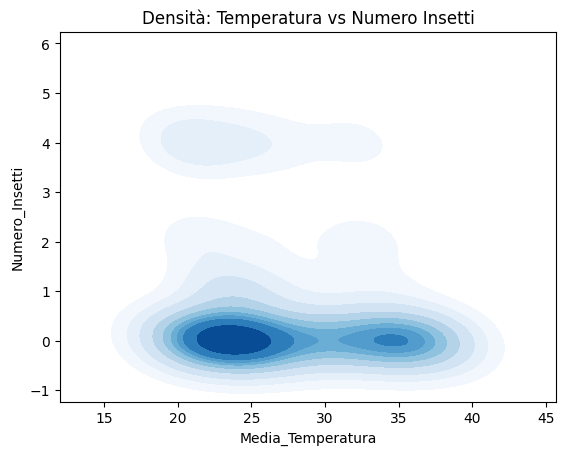

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.kdeplot(
    x=meteo_with_catture['Media_Temperatura'],
    y=meteo_with_catture['Numero_Insetti'],
    cmap="Blues", fill=True
)
plt.title('Densità: Temperatura vs Numero Insetti')
plt.xlabel('Media_Temperatura')
plt.ylabel('Numero_Insetti')
plt.show()


La densità più alta si concentra attorno a temperature medie tra 20°C e 25°C con un Numero di Insetti vicino a zero.
Si osserva un'altra area di densità (meno pronunciata) a temperature superiori ai 30°C, sempre con un Numero di Insetti vicino a zero.
L'area superiore (Numero di Insetti > 3) mostra una densità molto bassa, suggerendo che eventi con un alto numero di insetti siano rari e potrebbero essere associati a condizioni particolari.


La relazione tra temperatura e numero di insetti sembra non essere lineare: mentre la densità si concentra a temperature moderate, un aumento della temperatura non corrisponde a un aumento significativo nel numero di insetti.
Potrebbero esserci altre variabili (ad esempio l'umidità o eventi stagionali) che influenzano il Numero di Insetti, oltre alla temperatura.

In [ ]:
correlation = meteo_with_catture[['Media_Temperatura', 'Numero_Insetti']].corr()
print(correlation)

                   Media_Temperatura  Numero_Insetti
Media_Temperatura           1.000000       -0.195083
Numero_Insetti             -0.195083        1.000000


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)  # Modello di grado 2
X_poly = poly.fit_transform(meteo_with_catture[['Media_Temperatura']])
model = LinearRegression()
model.fit(X_poly, meteo_with_catture['Numero_Insetti'])
print("Score:", model.score(X_poly, meteo_with_catture['Numero_Insetti']))

Score: 0.03833697169516237


In [ ]:
print(meteo_with_catture.dtypes)

Media_Temperatura           float64
Low_Temp                     object
High_Temp                    object
Media_Umidita                object
Date                 datetime64[ns]
Numero_Insetti                int64
dtype: object


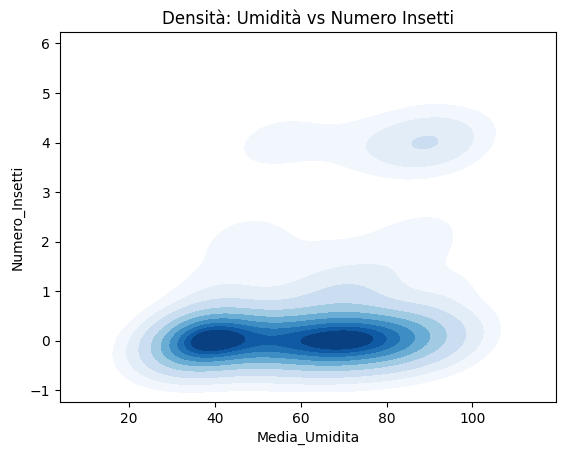

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

meteo_with_catture['Media_Umidita'] = meteo_with_catture['Media_Umidita'].str.replace(',', '.').astype(float)
meteo_with_catture['Numero_Insetti'] = meteo_with_catture['Numero_Insetti'].astype(float)


sns.kdeplot(
    x=meteo_with_catture['Media_Umidita'],
    y=meteo_with_catture['Numero_Insetti'],
    cmap="Blues", fill=True
)
plt.title('Densità: Umidità vs Numero Insetti')
plt.xlabel('Media_Umidita')
plt.ylabel('Numero_Insetti')
plt.show()

La densità più alta si concentra a valori di umidità tra 40% e 70% con un Numero di Insetti vicino a zero. Questo suggerisce che la maggior parte dei dati si trova in queste condizioni climatiche, ma con pochi insetti presenti.
Esiste una seconda regione di densità, meno intensa, per umidità superiori a 90%, che potrebbe indicare condizioni particolari associate a un leggero aumento del Numero di Insetti.
L'area con un alto numero di insetti (> 3) presenta densità molto bassa, evidenziando che tali eventi sono rari e non strettamente legati a una specifica gamma di umidità.

Il Numero di Insetti non sembra avere una relazione diretta lineare con l'umidità. La concentrazione vicino al valore zero suggerisce che altri fattori potrebbero essere necessari per spiegare variazioni significative nel Numero di Insetti.
Tuttavia, è evidente che valori di umidità estremamente bassi (< 30%) o estremamente alti (> 90%) sembrano essere associati a una variazione ridotta del Numero di Insetti.

La relazione tra Media Umidità e Numero di Insetti è complessa e non evidente. Potrebbe essere utile includere più variabili ambientali o climatiche (come la temperatura) per costruire un modello più predittivo e rilevante.



In [ ]:
correlation = meteo_with_catture[['Media_Umidita', 'Numero_Insetti']].corr()
print(correlation)

                Media_Umidita  Numero_Insetti
Media_Umidita         1.00000         0.32592
Numero_Insetti        0.32592         1.00000


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)  # Modello di grado 2
X_poly = poly.fit_transform(meteo_with_catture[['Media_Umidita']])
model = LinearRegression()
model.fit(X_poly, meteo_with_catture['Numero_Insetti'])
print("Score:", model.score(X_poly, meteo_with_catture['Numero_Insetti']))

Score: 0.12643614695062388


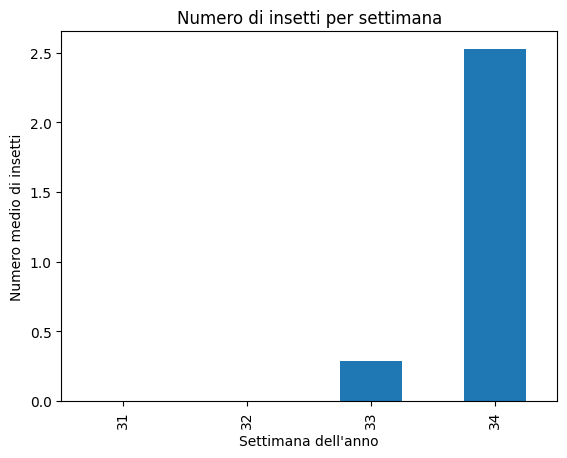

In [ ]:
# Assumendo che ci sia una colonna chiamata 'Date' con le date
meteo_with_catture['Date'] = pd.to_datetime(meteo_with_catture['Date'])  # Converte la colonna in formato datetime
meteo_with_catture.set_index('Date', inplace=True)  # Imposta 'Date' come indice

# Calcola la settimana dell'anno
meteo_with_catture['Week'] = meteo_with_catture.index.isocalendar().week

# Calcola il numero medio di insetti per settimana
weekly_pattern = meteo_with_catture.groupby('Week')['Numero_Insetti'].mean()

# Plot
import matplotlib.pyplot as plt
weekly_pattern.plot(kind='bar', title='Numero di insetti per settimana')
plt.xlabel('Settimana dell\'anno')
plt.ylabel('Numero medio di insetti')
plt.show()


Durante la settimana 31 e 32, il Numero medio di insetti è quasi nullo.
Si registra un aumento significativo a partire dalla settimana 33, con un picco massimo nella settimana 34, in cui il Numero medio di insetti raggiunge un valore superiore a 2.5.

Questo schema settimanale potrebbe essere collegato a fattori stagionali o ambientali che favoriscono la crescita o la cattura degli insetti nella settimana 34.
L'assenza di insetti nelle prime settimane (31 e 32) potrebbe indicare condizioni climatiche o biologiche sfavorevoli durante quel periodo.


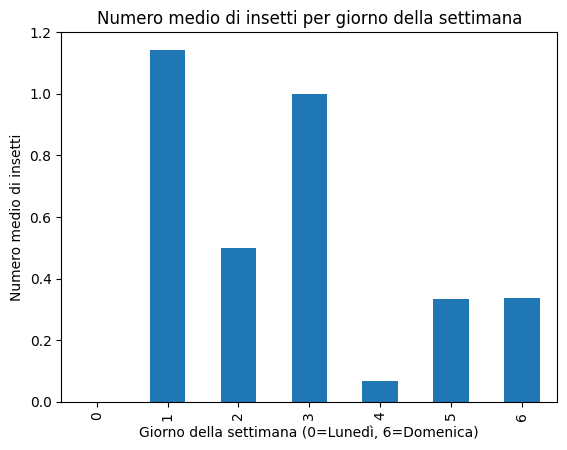

In [ ]:
meteo_with_catture['Weekday'] = meteo_with_catture.index.dayofweek  # 0=Lunedì, 6=Domenica

# Calcola il numero medio di insetti per giorno della settimana
weekday_pattern = meteo_with_catture.groupby('Weekday')['Numero_Insetti'].mean()

# Plot
weekday_pattern.plot(kind='bar', title='Numero medio di insetti per giorno della settimana')
plt.xlabel('Giorno della settimana (0=Lunedì, 6=Domenica)')
plt.ylabel('Numero medio di insetti')
plt.show()

Il picco massimo si verifica il martedì (1), con un Numero medio di insetti di circa 1.2.
Anche il lunedì (0) registra valori elevati rispetto agli altri giorni.
Il mercoledì (2) mostra una diminuzione significativa rispetto ai primi due giorni, mentre il giovedì (3) registra il minimo valore.
Nei giorni del weekend (sabato (5) e domenica (6)), il Numero medio di insetti risale leggermente, ma rimane basso rispetto ai primi giorni della settimana.


La distribuzione dei dati potrebbe essere influenzata da attività legate al monitoraggio o a condizioni ambientali specifiche per i primi giorni della settimana.
La fluttuazione potrebbe anche indicare cambiamenti ciclici nel comportamento degli insetti o nelle condizioni climatiche durante la settimana.


La relazione tra i giorni della settimana e il Numero medio di insetti potrebbe essere legata a fattori umani (attività di rilevamento) o naturali (ciclicità biologica). Sarebbe utile analizzare altri parametri climatici per identificare eventuali correlazioni significative.

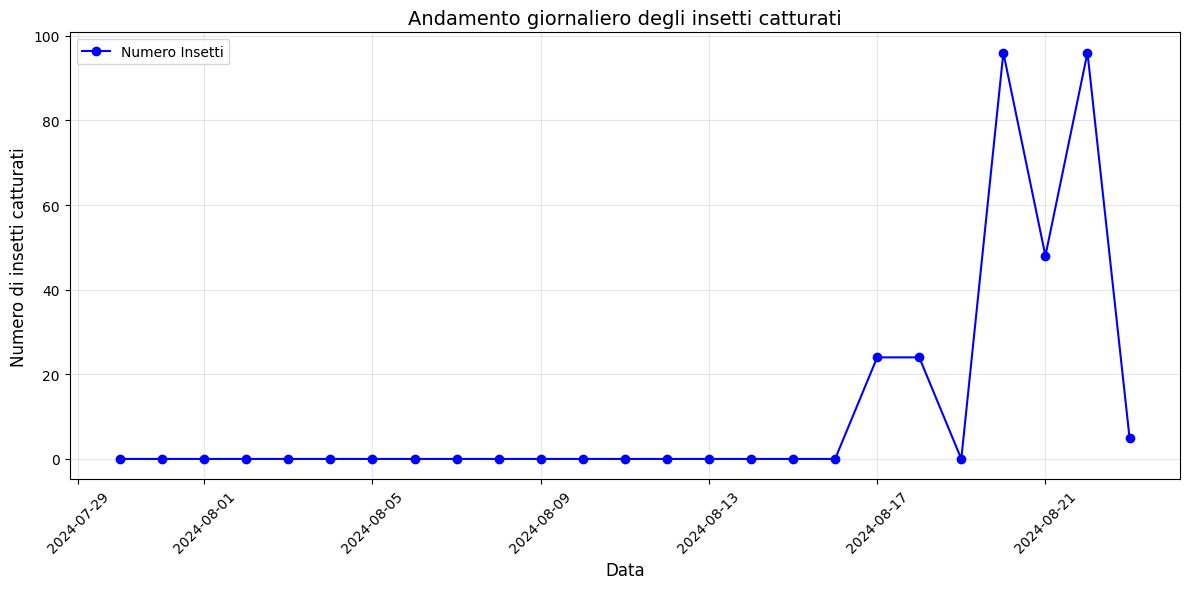

In [ ]:
import matplotlib.pyplot as plt

# Aggrega i dati per giorno
daily_counts = meteo_with_catture.resample('D')['Numero_Insetti'].sum()

# Grafico giornaliero
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', color='blue', label='Numero Insetti')
plt.title("Andamento giornaliero degli insetti catturati", fontsize=14)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Numero di insetti catturati", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


Per la maggior parte del periodo analizzato, fino al 17 agosto 2024, il numero di insetti catturati è nullo.
A partire dal 17 agosto, si osserva un aumento graduale nel numero di insetti, con picchi significativi il 20 e il 21 agosto, dove il numero supera i 90 insetti catturati al giorno.
Dopo il picco del 21 agosto, il conteggio scende bruscamente.

Questo comportamento suggerisce un evento o una condizione specifica (ad esempio cambiamenti climatici o una particolare attività) che ha favorito la cattura di insetti nei giorni centrali di agosto.
Il brusco calo post-picco potrebbe essere legato a un esaurimento del fenomeno che ha causato l'aumento o a un'interruzione delle attività di cattura.


#  Cluster Imola

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

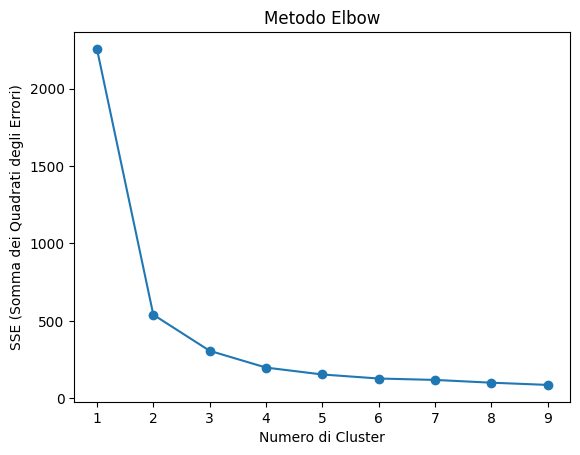

In [ ]:
# Seleziona le colonne rilevanti
features = meteo_with_catture[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]

# Converti eventuali virgole in punti (se presente nei numeri)
features = features.replace(',', '.', regex=True).astype(float)

# Normalizza i dati
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Trova il numero ottimale di cluster con il metodo Elbow
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# Visualizza il grafico Elbow
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Numero di Cluster')
plt.ylabel('SSE (Somma dei Quadrati degli Errori)')
plt.title('Metodo Elbow')
plt.show()

La SSE diminuisce rapidamente all'aumentare del numero di cluster, indicando che il modello diventa più preciso nel descrivere i dati.
Dopo il terzo cluster (k=3), la riduzione della SSE rallenta significativamente, formando un gomito ("elbow") nel grafico.

Il punto in cui si verifica il gomito rappresenta il compromesso ottimale tra numero di cluster e variabilità spiegata. In questo caso, il numero ottimale di cluster sembra essere k=3.
Utilizzare un numero maggiore di cluster non migliorerebbe significativamente il modello, ma potrebbe introdurre complessità non necessaria.


Il risultato suggerisce che il dataset presenta tre gruppi distinti

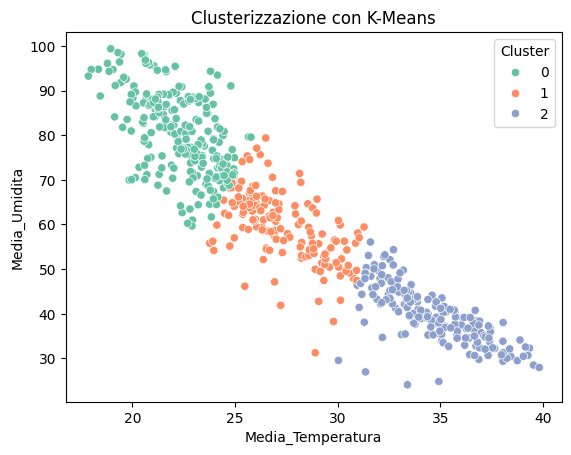

In [ ]:
# Applica K-Means con il numero di cluster scelto
optimal_k = 3  # Sostituisci con il numero ottimale scelto
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Aggiungi i cluster al dataset
meteo_with_catture['Cluster'] = clusters
sns.scatterplot(data=meteo_with_catture, x='Media_Temperatura', y='Media_Umidita', hue='Cluster', palette='Set2')
plt.title('Clusterizzazione con K-Means')
plt.show()

Cluster 0 (verde): Caratterizzato da valori di Media Umidità alti (oltre 70%) e Media Temperatura bassi (inferiori a 25°C).
Cluster 1 (arancione): Si colloca in una regione intermedia, con umidità moderata (circa 50%-70%) e temperature tra 25°C e 30°C.
Cluster 2 (blu): Presenta valori di Media Temperatura alti (oltre 30°C) e Media Umidità bassa (inferiore a 50%).




In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5136147089458559


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Supponiamo che il dataframe si chiami 'meteo_with_catture' e contenga i campi:
# 'Cluster' -> Cluster assegnati
# 'Numero_Insetti' -> Numero di insetti catturati

# Punto 2: Media e deviazione standard per cluster
cluster_stats = meteo_with_catture.groupby('Cluster')['Numero_Insetti'].agg(['mean', 'std', 'count'])
print(cluster_stats)

# Punto 3: ANOVA
# Separare i dati in base ai cluster
cluster_0 = meteo_with_catture[meteo_with_catture['Cluster'] == 0]['Numero_Insetti']
cluster_1 = meteo_with_catture[meteo_with_catture['Cluster'] == 1]['Numero_Insetti']
cluster_2 = meteo_with_catture[meteo_with_catture['Cluster'] == 2]['Numero_Insetti']

# Eseguire ANOVA
anova_result = f_oneway(cluster_0, cluster_1, cluster_2)
print('ANOVA F-statistic:', anova_result.statistic)
print('ANOVA p-value:', anova_result.pvalue)

             mean       std  count
Cluster                           
0        0.773504  1.415724    234
1        0.424837  1.055642    153
2        0.265537  0.827509    177
ANOVA F-statistic: 10.333657895668233
ANOVA p-value: 3.915976757999279e-05


Cluster 0:
Ha la media più alta di 0.77, con una deviazione standard di 1.41, suggerendo una variabilità maggiore rispetto agli altri cluster.
È il cluster più popoloso con 234 osservazioni.
Cluster 1:
La media è 0.42, inferiore rispetto al Cluster 0, ma con una deviazione standard più contenuta (1.05).
Ha il numero minore di osservazioni, 153.
Cluster 2:
La media è la più bassa, 0.26, con la deviazione standard più piccola (0.82), suggerendo che i valori sono più concentrati vicino alla media.


I risultati ANOVA suggeriscono che i cluster hanno una differenza significativa nella media del Numero di Insetti, rafforzando l'ipotesi che i gruppi climatici identificati abbiano un impatto diretto sul comportamento degli insetti. È consigliabile esplorare ulteriormente le caratteristiche specifiche di ciascun cluster per interpretare meglio queste differenze.

Cluster
0    0.773504
1    0.424837
2    0.265537
Name: Numero_Insetti, dtype: float64


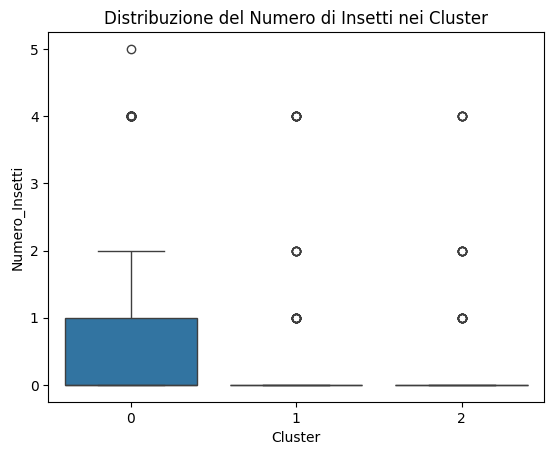

In [ ]:
cluster_insect_means = meteo_with_catture.groupby('Cluster')['Numero_Insetti'].mean()
print(cluster_insect_means)
sns.boxplot(data=meteo_with_catture, x='Cluster', y='Numero_Insetti')
plt.title('Distribuzione del Numero di Insetti nei Cluster')
plt.show()

Il boxplot evidenzia la distribuzione del Numero di Insetti per ciascun cluster.
Cluster 0:
Mostra una maggiore variabilità rispetto agli altri cluster.
Alcuni valori (outlier) superano 4 insetti, indicando eventi straordinari.
Cluster 1 e 2:
Presentano distribuzioni molto concentrate con valori vicini a zero.
Gli outlier suggeriscono che, anche in condizioni meno favorevoli, possono verificarsi eventi con insetti catturati.


Il Cluster 0 potrebbe rappresentare situazioni climatiche ideali per una maggiore attività degli insetti, mentre i Cluster 1 e 2 riflettono condizioni meno favorevoli. Gli outlier in tutti i cluster suggeriscono che eventi eccezionali possono verificarsi indipendentemente dalle condizioni medie.

In [ ]:
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(
    meteo_with_catture[meteo_with_catture['Cluster'] == 0]['Numero_Insetti'],
    meteo_with_catture[meteo_with_catture['Cluster'] == 1]['Numero_Insetti'],
    meteo_with_catture[meteo_with_catture['Cluster'] == 2]['Numero_Insetti']
)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 10.333657895668233, P-value: 3.915976757999279e-05


In [ ]:
# Importa le librerie necessarie
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepara il dataset
# Sostituisci 'meteo_with_catture' con il nome del tuo DataFrame
X = meteo_with_catture[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita', 'Cluster']]
y = meteo_with_catture['Numero_Insetti']

# Converti eventuali stringhe con virgola in numeri float
X = X.replace(',', '.', regex=True).astype(float)

# Dividi i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizza le feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crea e addestra il modello Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Effettua le previsioni
rf_pred = rf.predict(X_test_scaled)

# Valuta le performance
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest Regressor Performance:")
print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"R²: {rf_r2}")

Random Forest Regressor Performance:
MAE: 0.6833628318584071
RMSE: 1.1765646708867137
R²: 0.047516801379458795


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SARIMA Performance:
MAE: 42.19999999999964
RMSE: 48.7462819094945


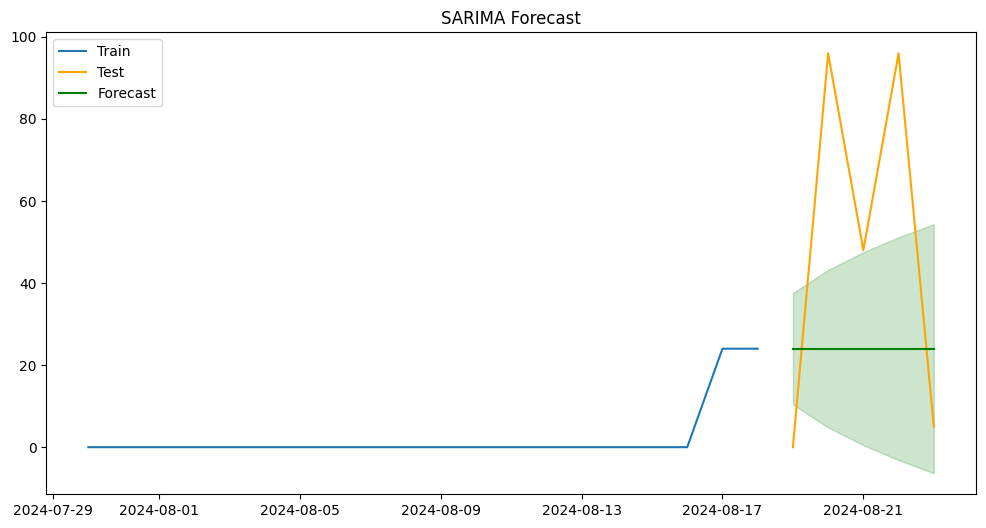

In [ ]:
# Importa le librerie necessarie
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Aggrega i dati su base giornaliera (se necessario)
#daily_insects = meteo_with_catture['Numero_Insetti'].resample('D').sum()

# Dividi i dati in training e test set
train_size = int(len(daily_insects) * 0.8)
train, test = daily_insects[:train_size], daily_insects[train_size:]

# Costruisci il modello SARIMA
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))  # Modifica i parametri in base ai tuoi dati
sarima = model.fit(disp=False)

# Effettua previsioni sul test set
forecast = sarima.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Calcola le metriche
mae = mean_absolute_error(test, forecast_mean)
rmse = mean_squared_error(test, forecast_mean, squared=False)
print(f"SARIMA Performance:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Visualizza i risultati
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.2)
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/meteo_with_catture_imola1.csv')

# Convert the comma values to dot for correct numerical parsing
df['Low_Temp'] = df['Low_Temp'].str.replace(',', '.').astype(float)
df['High_Temp'] = df['High_Temp'].str.replace(',', '.').astype(float)
df['Media_Umidita'] = df['Media_Umidita'].str.replace(',', '.').astype(float)

# Define features (predictors) and target variable
X = df[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]
y = df['Numero_Insetti']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = model.score(X_test, y_test)
print(f"R-squared: {r2}")

# Output the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 1.3337167197163555
R-squared: 0.08232413007553907
Coefficients: [0.08507268 0.03676724 0.05929849 0.07082354]
Intercept: -8.871628672186244




Con un valore di 1.3337, il modello presenta un errore moderato. Tuttavia, senza un confronto diretto con la variabilità della variabile target (Numero_Insetti), è difficile giudicare pienamente questo risultato.


Il valore di 𝑅2=0.0823 indica che solo l'8.23% della variabilità nel numero di insetti è spiegata dalle variabili climatiche incluse nel modello. Questo suggerisce che le variabili selezionate non catturano adeguatamente i fattori che influenzano il numero di insetti

La bassa capacità predittiva potrebbe essere dovuta all'assenza di variabili significative non incluse nel modello, come fattori ambientali, stagionalità o variabili biologiche legate agli insetti.



In [ ]:
# Importa le librerie necessarie
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepara il dataset
# Sostituisci 'meteo_with_catture' con il nome del tuo DataFrame
X = meteo_with_catture[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita', 'Cluster']]

# Converti 'Numero_Insetti' in classi (esempio: 0 = pochi insetti, 1 = molti insetti)
y = meteo_with_catture['Numero_Insetti']
# Definisci una soglia per creare classi
threshold = y.median()
y_class = (y > threshold).astype(int)  # 0 = sotto la soglia, 1 = sopra la soglia

# Converti eventuali stringhe con virgola in numeri float
X = X.replace(',', '.', regex=True).astype(float)

# Dividi i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Standardizza le feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crea e addestra il modello Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Effettua le previsioni
rf_pred = rf_clf.predict(X_test_scaled)

# Valuta le performance
accuracy = accuracy_score(y_test, rf_pred)
report = classification_report(y_test, rf_pred)
conf_matrix = confusion_matrix(y_test, rf_pred)

print(f"Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)

Random Forest Classifier Performance:
Accuracy: 0.831858407079646

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        93
           1       0.55      0.30      0.39        20

    accuracy                           0.83       113
   macro avg       0.70      0.62      0.64       113
weighted avg       0.81      0.83      0.81       113


Confusion Matrix:
[[88  5]
 [14  6]]


Precisione: 86%, Recall: 95%, F1-Score: 90%. Questi valori indicano che il modello è molto efficace nel predire correttamente i campioni della classe 0.
La bassa percentuale di falsi negativi per la classe 0 è particolarmente utile se questa classe rappresenta l'evento più importante da monitorare o se è numericamente dominante.


Il punteggio macro avg (F1-Score: 64%) riflette una media aritmetica tra le classi, mostrando che il modello favorisce la classe maggioritaria.
Il punteggio weighted avg (F1-Score: 81%) è ponderato sul supporto di ciascuna classe, risultando elevato per via del dominio della classe 0.

Il modello classifica correttamente 88 su 93 campioni della classe 0 (5 falsi positivi).
Per la classe 1, identifica solo 6 campioni su 20 correttamente (14 falsi negativi), sottolineando una scarsa capacità di catturare la minoranza.


# Imola 2

##Merge



In [ ]:
import pandas as pd

# Percorsi ai file CSV
file_meteo_csv = '/content/dati-meteo-storici (Imola 2)(csv).csv'
file_catture_csv = '/content/grafico-delle-catture (Imola 2)(csv).csv'

# Leggiamo i file CSV con il separatore corretto e saltiamo righe inutili
meteo_df = pd.read_csv(
    file_meteo_csv, sep=',', skiprows=2,
    names=['DateTime', 'Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita'],
    skipinitialspace=True
)

catture_df = pd.read_csv(
    file_catture_csv, sep=',', skiprows=2,
    names=['DateTime', 'Numero_Insetti', 'Nuove_Catture', 'Recensito', 'Evento'],
    skipinitialspace=True
)

# Pulizia dei dati
meteo_df = meteo_df[1:]  # Rimuove una riga di metadati iniziale
catture_df = catture_df[2:]  # Rimuove righe di metadati


# Correggere i valori non validi
meteo_df['Media_Temperatura'] = meteo_df['Media_Temperatura'].str.replace(';', '.', regex=False)

# Convertire la colonna in float, ignorando errori
meteo_df['Media_Temperatura'] = pd.to_numeric(meteo_df['Media_Temperatura'], errors='coerce')

# Opzionale: Rimuovere righe con valori mancanti (NaN) dopo la conversione
meteo_df = meteo_df.dropna(subset=['Media_Temperatura'])


meteo_df['DateTime'] = pd.to_datetime(meteo_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
catture_df['DateTime'] = pd.to_datetime(catture_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

meteo_df['Date'] = meteo_df['DateTime'].dt.date
catture_df['Date'] = catture_df['DateTime'].dt.date

catture_df['Numero_Insetti'] = catture_df['Numero_Insetti'].fillna(0).astype(int)
catture_per_day = catture_df.groupby('Date', as_index=False)['Numero_Insetti'].sum()

meteo_with_catture_imola2 = pd.merge(meteo_df, catture_per_day, on='Date', how='left')
meteo_with_catture_imola2['Numero_Insetti'] = meteo_with_catture_imola2['Numero_Insetti'].fillna(0).astype(int)

# Salviamo il risultato
meteo_with_catture_imola2.to_csv('meteo_with_catture_imola2.csv', index=False)

print(meteo_with_catture_imola2)

    DateTime  Media_Temperatura Low_Temp High_Temp  Media_Umidita Date  \
0        NaT              64.33  5;34;35        86            NaN  NaT   
1        NaT              25.32     9;33      5;34           76.0  NaT   
2        NaT              69.30     9;33      4;33           67.0  NaT   
3        NaT              39.28     2;30      5;38           83.0  NaT   
4        NaT              72.22     4;24      7;54            9.0  NaT   
..       ...                ...      ...       ...            ...  ...   
495      NaT              23.26     7;27      9;68           24.0  NaT   
496      NaT               2.25     7;26      5;73           82.0  NaT   
497      NaT               5.23     6;25      5;81           22.0  NaT   
498      NaT              28.22     9;23      6;88           14.0  NaT   
499      NaT              59.22     5;22      7;92            1.0  NaT   

     Numero_Insetti  
0                 0  
1                 0  
2                 0  
3                 0  
4

## Regressione


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Caricare il dataset
file_path = '/content/meteo_with_catture_imola2.csv'
data = pd.read_csv(file_path)

# Correzione delle colonne con valori numerici o stringhe
columns_to_fix = ['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']

for col in columns_to_fix:
    if data[col].dtype == 'object':  # Verifica se la colonna contiene stringhe
        data[col] = data[col].str.replace(',', '.').astype(float)


# Continuare con la regressione
features = ['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']
target = 'Numero_Insetti'

X = data[features]
y = data[target]

# Dividere il dataset in training e test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modello di regressione
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

# Predizioni e calcolo dell'errore
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


RMSE: 0.1858678082570431
Coefficients: [-0.02077635  0.01037749  0.00295757 -0.00139236]
Intercept: 0.3419111788167714


Il modello di regressione lineare mostra un RMSE di 0.1859, indicando che il modello ha una discreta capacità di prevedere i dati.

 I coefficienti rivelano che le variabili indipendenti hanno un impatto limitato sul target, con effetti minimi sia positivi che negativi. Questo suggerisce che il modello potrebbe non spiegare completamente la variabilità del fenomeno, probabilmente a causa di variabili mancanti o di relazioni non lineari tra le variabili esistenti. L'intercetta fornisce il valore previsto quando tutte le variabili sono a zero.


##Classificazione


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Caricare il dataset
file_path = '/content/meteo_with_catture_imola2.csv'
data = pd.read_csv(file_path)

# Correzione delle colonne con valori numerici o stringhe
columns_to_fix = ['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']
for col in columns_to_fix:
    if data[col].dtype == 'object':  # Verifica se la colonna contiene stringhe
        data[col] = data[col].str.replace(',', '.').astype(float)

# Creare una variabile target categoriale
# Classifica: 0 = Basso numero di insetti, 1 = Alto numero di insetti
threshold = data['Numero_Insetti'].median()  # Soglia di classificazione
data['Classe_Insetti'] = (data['Numero_Insetti'] > threshold).astype(int)

# Selezionare le caratteristiche e il target
features = ['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']
target = 'Classe_Insetti'

X = data[features]
y = data[target]

# Dividere il dataset in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modello di classificazione (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predire sul set di test
y_pred = clf.predict(X_test)

# Valutazione del modello
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Importanza delle caratteristiche
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)


Confusion Matrix:
 [[107   1]
 [  4   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.00      0.00      0.00         4

    accuracy                           0.96       112
   macro avg       0.48      0.50      0.49       112
weighted avg       0.93      0.96      0.94       112


Feature Importance:
              Feature  Importance
0  Media_Temperatura    0.318091
3      Media_Umidita    0.261013
1           Low_Temp    0.219398
2          High_Temp    0.201498


La classificazione mostra un'accuratezza complessiva del 96%, indicando che il modello identifica correttamente la maggior parte delle osservazioni. Tuttavia, l'analisi dettagliata del report evidenzia una forte sbilanciatura tra le classi. La classe "0" ha una precisione e un recall molto elevati (rispettivamente 96% e 99%), mentre la classe "1" non viene praticamente riconosciuta, con un F1-score pari a zero. Questo suggerisce che il modello è fortemente influenzato dalla distribuzione delle classi, probabilmente perché la classe "1" è sottorappresentata (solo 4 esempi nel supporto).

# Imola 3

##Merge

In [ ]:
import pandas as pd

# Percorsi ai file CSV
file_meteo_csv = '/content/dati-meteo-storici (Imola 3).csv'
file_catture_csv = '/content/grafico-delle-catture (Imola 3).csv'

# Leggiamo i file CSV con il separatore corretto e saltiamo righe inutili
meteo_df = pd.read_csv(
    file_meteo_csv, sep=',', skiprows=2,
    names=['DateTime', 'Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita'],
    skipinitialspace=True
)

catture_df = pd.read_csv(
    file_catture_csv, sep=',', skiprows=2,
    names=['DateTime', 'Numero_Insetti', 'Nuove_Catture', 'Recensito', 'Evento'],
    skipinitialspace=True
)

# Pulizia dei dati
meteo_df = meteo_df[1:]  # Rimuove una riga di metadati iniziale
catture_df = catture_df[2:]  # Rimuove righe di metadati

# Conversioni e preparazione
meteo_df['Media_Temperatura'] = (
    meteo_df['Media_Temperatura']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

meteo_df['DateTime'] = pd.to_datetime(meteo_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
catture_df['DateTime'] = pd.to_datetime(catture_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

meteo_df['Date'] = meteo_df['DateTime'].dt.date
catture_df['Date'] = catture_df['DateTime'].dt.date

catture_df['Numero_Insetti'] = catture_df['Numero_Insetti'].fillna(0).astype(int)
catture_per_day = catture_df.groupby('Date', as_index=False)['Numero_Insetti'].sum()

meteo_with_catture_imola3 = pd.merge(meteo_df, catture_per_day, on='Date', how='left')
meteo_with_catture_imola3['Numero_Insetti'] = meteo_with_catture_imola3['Numero_Insetti'].fillna(0).astype(int)

# Salviamo il risultato
meteo_with_catture_imola3.to_csv('meteo_with_catture_imola3.csv', index=False)

print(meteo_with_catture_imola3)

               DateTime  Media_Temperatura Low_Temp High_Temp Media_Umidita  \
0   2024-07-30 12:00:00              34.00     33,6      34,4         36,44   
1   2024-07-30 13:00:00              34.32     34,1      34,7         34,62   
2   2024-07-30 14:00:00              34.38     33,9      34,8         34,43   
3   2024-07-30 15:00:00              33.90     33,5      34,2          35,5   
4   2024-07-30 16:00:00              33.05     32,8      33,3         35,22   
..                  ...                ...      ...       ...           ...   
559 2024-08-22 20:00:00              27.24     26,6        28         68,17   
560 2024-08-22 21:00:00              25.89     25,5      26,4         73,96   
561 2024-08-22 22:00:00              24.22     23,4      25,4         81,69   
562 2024-08-22 23:00:00              23.13     22,8      23,4         88,43   
563 2024-08-23 00:00:00              22.74     22,7      22,8         90,89   

           Date  Numero_Insetti  
0    2024-07-30  

##Classificazione


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

file_path = '/content/meteo_with_catture_imola3.csv'
data = pd.read_csv(file_path)

for col in ['Low_Temp', 'High_Temp', 'Media_Umidita']:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Unire le classi meno rappresentate (ad esempio, 2 e 3) in un'unica classe
data['Numero_Insetti'] = data['Numero_Insetti'].replace({2: 1, 3: 1})

# Separazione delle feature (X) e del target (y)
X = data[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]
y = data['Numero_Insetti']

# Suddivisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Addestramento del modello SVM con pesi bilanciati
svm_model = SVC(class_weight='balanced', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Previsione e valutazione del modello
y_pred_svm = svm_model.predict(X_test)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Visualizza il report
print(pd.DataFrame(report_svm).transpose())


              precision    recall  f1-score     support
0              0.987952  0.836735  0.906077   98.000000
1              0.466667  0.933333  0.622222   15.000000
accuracy       0.849558  0.849558  0.849558    0.849558
macro avg      0.727309  0.885034  0.764150  113.000000
weighted avg   0.918755  0.849558  0.868397  113.000000


##Regressione


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Caricamento del dataset
file_path = '/content/meteo_with_catture_imola3.csv'
data = pd.read_csv(file_path)

# Pulizia dei dati: sostituzione delle virgole e conversione in float
columns_to_clean = ['Low_Temp', 'High_Temp', 'Media_Umidita']
for col in columns_to_clean:
    data[col] = data[col].astype(str).str.replace(',', '.').astype(float)

# Definizione delle variabili indipendenti (X) e della variabile target (y)
X = data[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]
y = data['Numero_Insetti']

# Divisione del dataset in training e testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inizializzazione e addestramento del modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Previsione sui dati di test
y_pred = model.predict(X_test)

# Valutazione del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Stampa dei risultati
print("### Risultati della Regressione ###")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


### Risultati della Regressione ###
Mean Squared Error (MSE): 0.2973
R-squared (R²): 0.0673


La regressione lineare applicata mostra una capacità predittiva molto limitata, con un R² di appena 0.0673, indicando che il modello spiega solo una minima parte della variabilità del numero di insetti catturati. Il valore di MSE (0.2973) segnala un errore moderato, ma il grafico evidenzia una scarsa corrispondenza tra i valori reali e quelli previsti, con il modello incapace di catturare i picchi o le variazioni significative. Questo suggerisce che la relazione tra le variabili climatiche e il numero di insetti non è lineare o è influenzata da fattori non considerati nel dataset. Complessivamente, la regressione lineare non è sufficiente per descrivere adeguatamente il fenomeno e richiede l'uso di modelli più sofisticati per ottenere previsioni più accurate.